# CredX - BFS Capstone

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing demographic data
demo = pd.read_csv("Demographic data.csv")
demo.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [3]:
# Importing Credit Bureau Data
cb = pd.read_csv("Credit Bureau data.csv")
cb.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


## Understanding Datasets

In [4]:
# Understanding the datasets
print('--------------------------------------------------------------------------------------')
print('Non-null values and datatypes in demographic dataset')
print('--------------------------------------------------------------------------------------')
print(demo.info())
print('--------------------------------------------------------------------------------------')
print('Non-null values and datatypes in credit bureau dataset')
print('--------------------------------------------------------------------------------------')
print(cb.info())
print('--------------------------------------------------------------------------------------')
print('Shape of demographic dataset')
print('--------------------------------------------------------------------------------------')
print(demo.shape)
print('--------------------------------------------------------------------------------------')
print('Shape of credit bureau dataset')
print('--------------------------------------------------------------------------------------')
print(cb.shape)

--------------------------------------------------------------------------------------
Non-null values and datatypes in demographic dataset
--------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence          

In [5]:
# Understanding the continuous attributes in demographic dataset
demo.describe()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag
count,7.129500e+04,71295.000000,71292.000000,71295.000000,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,44.943039,2.865188,27.195224,34.563420,33.958244,0.042193
std,2.885905e+08,9.939211,1.382319,15.514626,36.759758,20.410824,0.201030
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483719e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975698e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.495868e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000


In [6]:
# Understanding the continuous attributes in credit bureau dataset
cb.describe()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,70237.000000,71294.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71023.000000,7.102300e+04,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.696926,2.298048,5.826888,1.206901,2.397447,1.763532,3.535241,0.256424,1.249163e+06,8.186633,0.084620,0.042193
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.533308,2.070191,5.065096,1.352936,2.420086,1.971294,3.582199,0.436662,1.278874e+06,7.090776,0.278318,0.201030
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483719e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115320e+05,3.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749920e+05,6.000000,0.000000,0.000000
75%,7.495868e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920796e+06,10.000000,0.000000,0.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000


In [7]:
# Checking for duplicate values in demographic dataset
print('Duplicate values in demograhic dataset:')
print(demo.duplicated().sum())
print('----------------------------------------------')
print('Duplicate values in credit bureau dataset:')
print(cb.duplicated().sum())
print('----------------------------------------------')
print('Duplicate Applicant ID in demograhic dataset')
print(demo['Application ID'].duplicated().sum())
print('----------------------------------------------')
print('Duplicate Applicant ID in credit bureau dataset')
print(cb['Application ID'].duplicated().sum())

Duplicate values in demograhic dataset:
0
----------------------------------------------
Duplicate values in credit bureau dataset:
0
----------------------------------------------
Duplicate Applicant ID in demograhic dataset
3
----------------------------------------------
Duplicate Applicant ID in credit bureau dataset
3


__We can observe that there are unique data points overall. However, there are duplicate applicant id's and this needs to be handled.__

In [8]:
# Renaming columns in the demographic data
demo.rename(columns={'Marital Status (at the time of application)':'Marital Status','Profession ': 'Profession'},inplace=True)

In [9]:
# Checking for number of null values in each column of demographic dataset
demo.isnull().sum()

Application ID                          0
Age                                     0
Gender                                  2
Marital Status                          6
No of dependents                        3
Income                                  0
Education                             119
Profession                             14
Type of residence                       8
No of months in current residence       0
No of months in current company         0
Performance Tag                      1425
dtype: int64

In [10]:
# Checking for number of null values in each column of demographic dataset
cb.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

__The null values in the performance tag of the demographic and credit bureau dataset represent the rejected population, so these reject population would be handled differently by creating a new dataframe for them.__

## EDA - Demographic and Credit Bureau Dataset

In [11]:
# Inspect categorical variables in demographic dataset
print('Counts of various values of Gender')
print(demo['Gender'].astype('category').value_counts())
print('-------------------')
print('Counts of various values of Education')
print(demo['Education'].astype('category').value_counts())
print('-------------------')
print('Counts of various values of Profession')
print(demo['Profession'].astype('category').value_counts())
print('-------------------')
print('Counts of various values of Type of residence')
print(demo['Type of residence'].astype('category').value_counts())
print('-------------------')
print('Counts of various values of Marital Status')
print(demo['Marital Status'].astype('category').value_counts())
print('-------------------')
print('Counts of various values of Performance Tag')
print(demo['Performance Tag'].astype('category').value_counts())

Counts of various values of Gender
M    54456
F    16837
Name: Gender, dtype: int64
-------------------
Counts of various values of Education
Professional    24839
Masters         23970
Bachelor        17697
Phd              4549
Others            121
Name: Education, dtype: int64
-------------------
Counts of various values of Profession
SAL        40439
SE_PROF    16535
SE         14307
Name: Profession, dtype: int64
-------------------
Counts of various values of Type of residence
Rented                 53397
Owned                  14243
Living with Parents     1818
Company provided        1630
Others                   199
Name: Type of residence, dtype: int64
-------------------
Counts of various values of Marital Status
Married    60730
Single     10559
Name: Marital Status, dtype: int64
-------------------
Counts of various values of Performance Tag
0.0    66922
1.0     2948
Name: Performance Tag, dtype: int64


In [12]:
# Inspect categorical variables in credit bureau dataset
print('Counts of 0/1 in open home loan')
print(cb['Presence of open home loan'].astype('category').value_counts())
print('-------------------')
print('Counts of 0/1 in open auto loan')
print(cb['Presence of open auto loan'].astype('category').value_counts())

Counts of 0/1 in open home loan
0.0    52811
1.0    18212
Name: Presence of open home loan, dtype: int64
-------------------
Counts of 0/1 in open auto loan
0    65262
1     6033
Name: Presence of open auto loan, dtype: int64


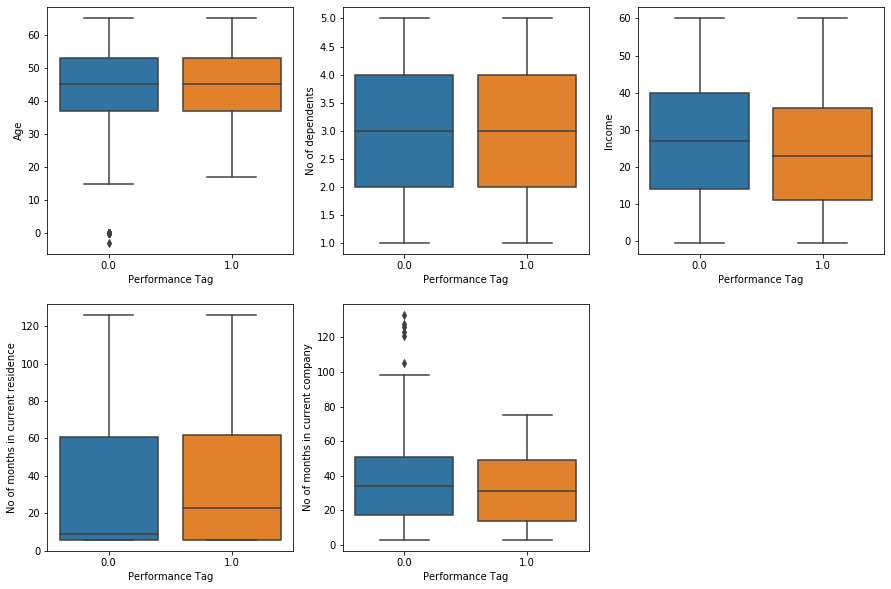

In [13]:
# Plots to see the impact of continuous variables in demographic dataset on defaulting behaviour

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='Performance Tag', y='Age', data=demo)

plt.subplot(2, 3, 2)
sns.boxplot(x='Performance Tag', y='No of dependents', data=demo)

plt.subplot(2, 3, 3)
sns.boxplot(x='Performance Tag', y='Income', data=demo)

plt.subplot(2, 3, 4)
sns.boxplot(x='Performance Tag', y='No of months in current residence', data=demo)

plt.subplot(2, 3, 5)
sns.boxplot(x='Performance Tag', y='No of months in current company', data=demo)

plt.show()

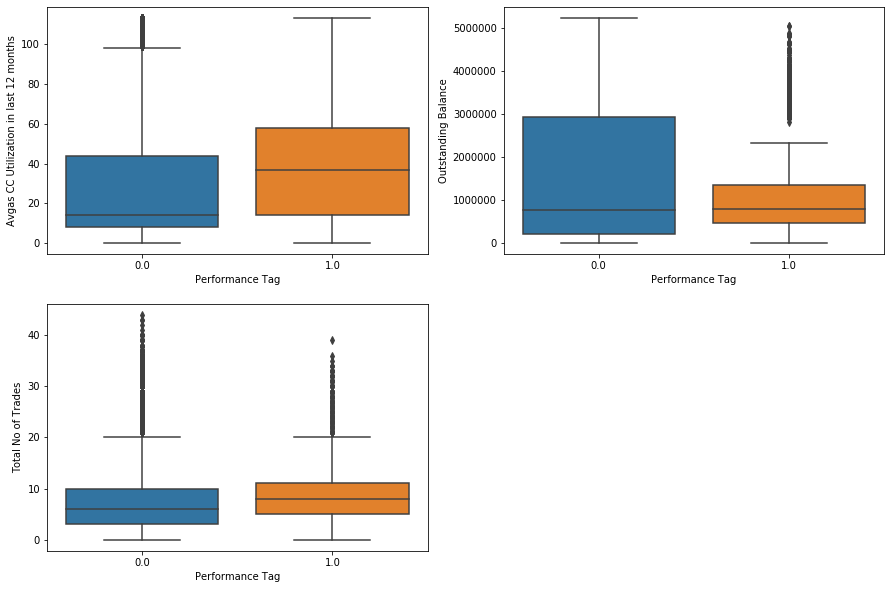

In [14]:
# Plots to see the impact of continuous variables in demographic dataset on defaulting behaviour

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Performance Tag', y='Avgas CC Utilization in last 12 months', data=cb)

plt.subplot(2, 2, 2)
sns.boxplot(x='Performance Tag', y='Outstanding Balance', data=cb)

plt.subplot(2, 2, 3)
sns.boxplot(x='Performance Tag', y='Total No of Trades', data=cb)

plt.show()

__For the demographic dataset:__
__We can observe with age that, values go below 18 and well below 0, which is quite unusual in terms of issuing credit cards. Also, the lower limit of the income - 0 to 10 is not a usual bracket to which the credit cards are issued.__

__For the credit bureau dataset:__
__We can see some outliers in the credit card utilization, outstanding balance and number of trades. We will be handling the outliers with the help of woe imputation.__

In [15]:
# Handling null values in the demographic dataset

# Removing duplicate application id's
demo.drop_duplicates('Application ID', keep=False, inplace=True)

# Adjusting lower limit of age (Based on internet research)
demo['Age'][demo['Age']<18] =18

# Adjusting lower limit of income to 10K (Based on internet research)
demo['Income'][demo['Income']<10] =10

# Replacing null values in Gender with 'M'
demo['Gender'].fillna('M', inplace=True)

# Replacing null values in Marital Status with 'Married'
demo['Marital Status'].fillna('Married', inplace=True)

# Grouping multiple categories of Education
demo.replace({'Education' : {'Masters' : 'Tertiary_Education','Bachelor':'Tertiary_Education', 'Phd':'Tertiary_Education'}}, 
                inplace=True)

# Dropping the rows corresponding to null values of 'No of dependents'
demo = demo[~np.isnan(demo['No of dependents'])]

# Replacing null values in Type of residence with 'Rented'
demo['Type of residence'].fillna('Rented', inplace=True)

# Replacing null values in Profession with 'SAL'
demo['Profession'].fillna('SAL', inplace=True)

# Replacing null values in Education with 'Unknown'
demo['Education'].fillna('Unknown', inplace=True)

In [16]:
# Handling null values in the credit bureau dataset

# Removing duplicate application id's
cb.drop_duplicates('Application ID', keep=False, inplace=True)

# Replacing null values in the credit card utilization with 0 as the null values indicate either no credit card or no credit history
cb['Avgas CC Utilization in last 12 months'].fillna(0, inplace=True)

# Replacing null values in number of trades with '1.0'
cb['No of trades opened in last 6 months'].fillna(1.0, inplace=True)

# The rows corresponding to null values in outstading balance have most of the values 0 which indicate no credit history. 
# So,replaced null values with 0.
cb['Outstanding Balance'].fillna(0, inplace=True)

In [17]:
demo.isnull().sum()

Application ID                          0
Age                                     0
Gender                                  0
Marital Status                          0
No of dependents                        0
Income                                  0
Education                               0
Profession                              0
Type of residence                       0
No of months in current residence       0
No of months in current company         0
Performance Tag                      1425
dtype: int64

In [18]:
cb.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                                0
No of trades opened in last 6 months                                  0
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

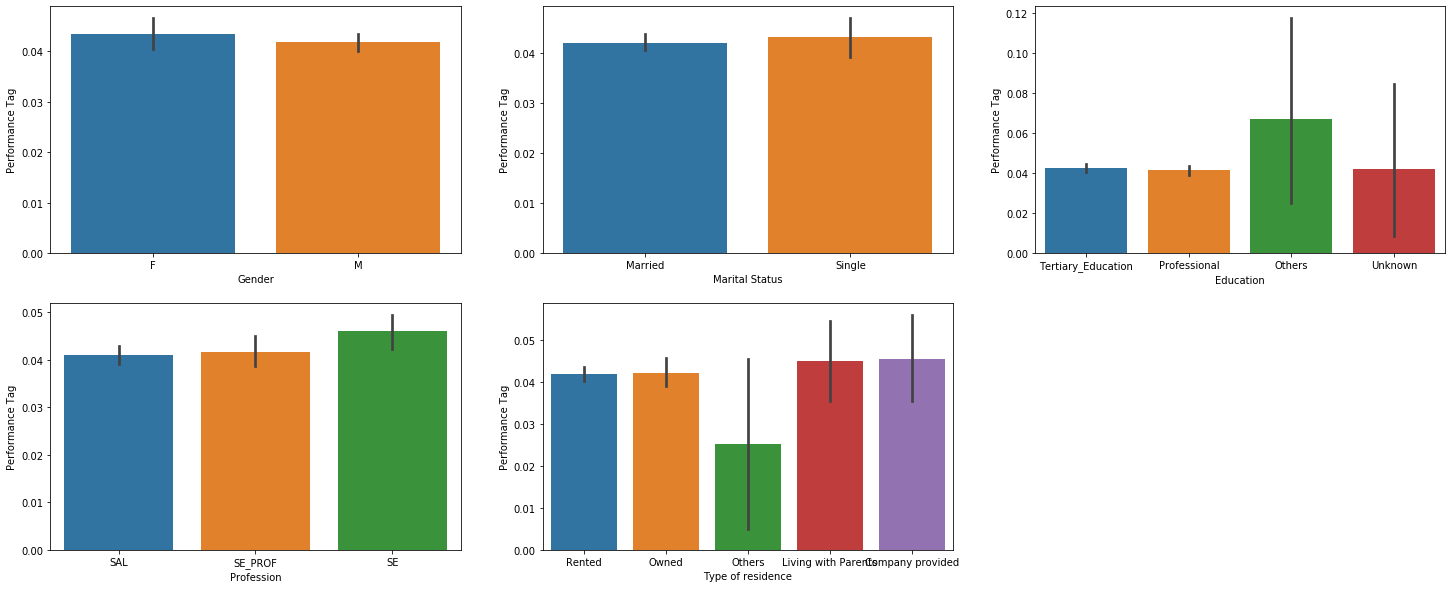

In [19]:
# Plots to see Categorical variables impact of defaulting
plt.figure(figsize=(25, 10))

plt.subplot(2, 3, 1)
sns.barplot(x='Gender', y='Performance Tag', data=demo, estimator=np.mean)

plt.subplot(2, 3, 2)
sns.barplot(x='Marital Status', y='Performance Tag', data=demo, estimator=np.mean)

plt.subplot(2, 3, 3)
sns.barplot(x='Education', y='Performance Tag', data=demo, estimator=np.mean)

plt.subplot(2, 3, 4)
sns.barplot(x='Profession', y='Performance Tag', data=demo, estimator=np.mean)

plt.subplot(2, 3, 5)
sns.barplot(x='Type of residence', y='Performance Tag', data=demo, estimator=np.mean)

plt.show()

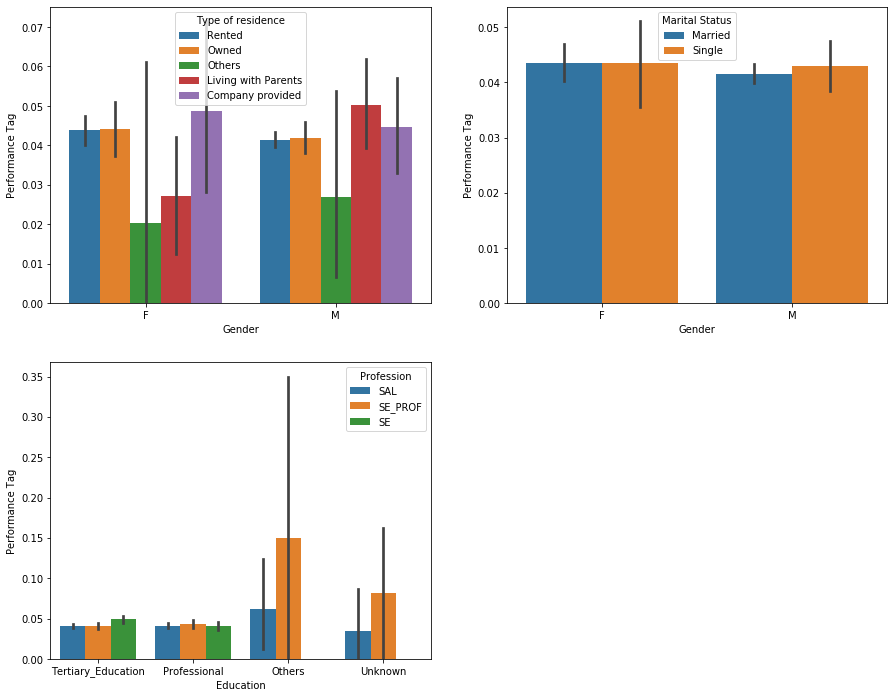

In [20]:
# Plots to see multivariate analysis of Categorical variables against defaulting
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.barplot(x='Gender', y='Performance Tag', hue= 'Type of residence',data=demo, estimator=np.mean)

plt.subplot(2, 2, 2)
sns.barplot(x='Gender', y='Performance Tag', hue= 'Marital Status', data=demo, estimator=np.mean)

plt.subplot(2, 2, 3)
sns.barplot(x='Education', y='Performance Tag',  hue= 'Profession', data=demo, estimator=np.mean)

plt.show()

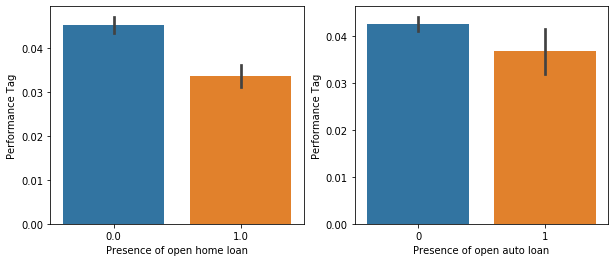

In [21]:
# Plots to see Categorical variables impact of defaulting
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.barplot(x='Presence of open home loan', y='Performance Tag', data=cb, estimator=np.mean)

plt.subplot(1, 2, 2)
sns.barplot(x='Presence of open auto loan', y='Performance Tag', data=cb, estimator=np.mean)

## WOE Analysis and Imputation

In [22]:
max_bin = 20
force_bin = 3

import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

In [23]:
def mono_bin(Y, X, n = max_bin):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

In [24]:
def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

In [25]:
def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

## WOE - Demographic Dataset

In [26]:
df_var = demo.drop(['Application ID', 'Performance Tag'], axis=1)
target = demo['Performance Tag']

In [27]:
final_iv, IV = data_vars(df_var, target)

In [28]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Age,18,40,24632,1071.0,0.043480,23561.0,0.956520,0.363420,0.352109,0.031620,0.000627
1,Age,41,50,22871,958.0,0.041887,21913.0,0.958113,0.325076,0.327480,-0.007367,0.000627
2,Age,51,65,22358,918.0,0.041059,21440.0,0.958941,0.311503,0.320411,-0.028196,0.000627
3,Gender,F,F,16504,718.0,0.043505,15786.0,0.956495,0.243638,0.235915,0.032211,0.000327
4,Gender,M,M,53357,2229.0,0.041775,51128.0,0.958225,0.756362,0.764085,-0.010159,0.000327
5,Marital Status,Married,Married,59545,2502.0,0.042019,57043.0,0.957981,0.848999,0.852482,-0.004094,0.000096
6,Marital Status,Single,Single,10316,445.0,0.043137,9871.0,0.956863,0.151001,0.147518,0.023338,0.000096
7,No of dependents,1,3,45989,1950.0,0.042401,44039.0,0.957599,0.661690,0.658143,0.005374,0.000056
8,No of dependents,4,5,23872,997.0,0.041764,22875.0,0.958236,0.338310,0.341857,-0.010429,0.000056
9,Income,10,14,18039,951.0,0.052719,17088.0,0.947281,0.322701,0.255373,0.234003,0.032527


In [29]:
IV.sort_values('IV', ascending=False)

,VAR_NAME,IV
7,No of months in current residence,0.048779
3,Income,0.032527
6,No of months in current company,0.010968
8,Profession,0.002226
9,Type of residence,0.000925
1,Education,0.000672
0,Age,0.000627
2,Gender,0.000327
4,Marital Status,0.000096
5,No of dependents,0.000056


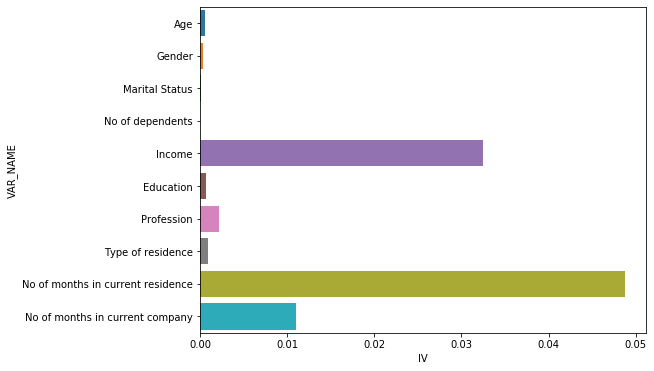

In [30]:
# Visualize IV 
plt.figure(figsize=(8, 6))
sns.barplot(y='VAR_NAME', x='IV', data=final_iv)
plt.show()

In [31]:
transform_vars_list = demo.columns.difference(['Application ID', 'Performance Tag'])
transform_prefix = 'woe_' # leave this value blank if you need replace the original column values

In [32]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            demo[transform_prefix + var] = demo[var].apply(lambda x: eval(replace_cmd))
        except:
            demo[transform_prefix + var] = demo[var].apply(lambda x: eval(replace_cmd1))

In [33]:
woe_demo = demo[['Application ID', 'woe_Age', 'woe_Education', 'woe_Gender', 'woe_Income', 'woe_Marital Status', 
                    'woe_No of dependents', 'woe_No of months in current company', 'woe_No of months in current residence', 
                    'woe_Profession', 'woe_Type of residence', 'Performance Tag']]
demo.drop(['woe_Age', 'woe_Education', 'woe_Gender', 'woe_Income', 'woe_Marital Status', 'woe_No of dependents', 
           'woe_No of months in current company', 'woe_No of months in current residence', 'woe_Profession', 
           'woe_Type of residence'], axis=1, inplace=True)

In [34]:
woe_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71286 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                           71286 non-null int64
woe_Age                                  71286 non-null float64
woe_Education                            71286 non-null float64
woe_Gender                               71286 non-null float64
woe_Income                               71286 non-null float64
woe_Marital Status                       71286 non-null float64
woe_No of dependents                     71286 non-null float64
woe_No of months in current company      71286 non-null float64
woe_No of months in current residence    71286 non-null float64
woe_Profession                           71286 non-null float64
woe_Type of residence                    71286 non-null float64
Performance Tag                          69861 non-null float64
dtypes: float64(11), int64(1)
memory usage: 9.6 MB


## WOE - Credit Bureau Data

In [35]:
cb['Presence of open home loan'] = cb['Presence of open home loan'].astype(str)
cb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71289 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71289 non-null int64
No of times 90 DPD or worse in last 6 months                       71289 non-null int64
No of times 60 DPD or worse in last 6 months                       71289 non-null int64
No of times 30 DPD or worse in last 6 months                       71289 non-null int64
No of times 90 DPD or worse in last 12 months                      71289 non-null int64
No of times 60 DPD or worse in last 12 months                      71289 non-null int64
No of times 30 DPD or worse in last 12 months                      71289 non-null int64
Avgas CC Utilization in last 12 months                             71289 non-null float64
No of trades opened in last 6 months                               71289 non-null float64
No of trades opened in last 12 months                              71289 non-null int64
No of P

In [36]:
cb.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                                0
No of trades opened in last 6 months                                  0
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [37]:
df_var = cb.drop(['Application ID', 'Performance Tag'], axis=1)
target = cb['Performance Tag']

In [38]:
final_iv, IV = data_vars(df_var, target)

In [39]:
IV.sort_values('IV', ascending=False)

,VAR_NAME,IV
0,Avgas CC Utilization in last 12 months,0.281539
11,No of trades opened in last 12 months,0.257429
1,No of Inquiries in last 12 months (excluding h...,0.229218
5,No of times 30 DPD or worse in last 12 months,0.188045
16,Total No of Trades,0.187303
3,No of PL trades opened in last 12 months,0.176644
6,No of times 30 DPD or worse in last 6 months,0.145708
7,No of times 60 DPD or worse in last 12 months,0.137676
4,No of PL trades opened in last 6 months,0.124744
9,No of times 90 DPD or worse in last 12 months,0.095714


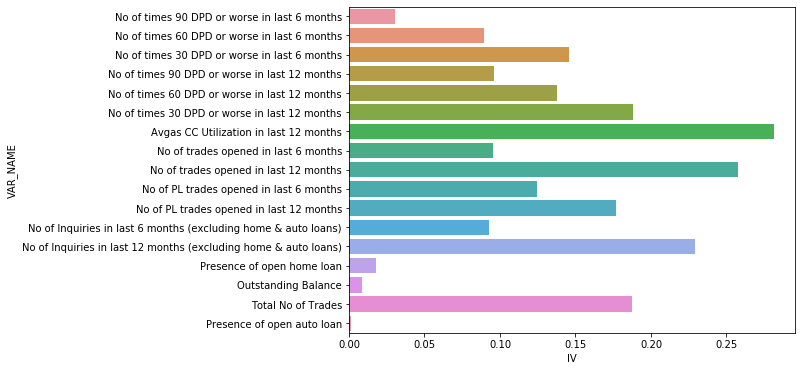

In [40]:
# Visualize IV 
plt.figure(figsize=(8, 6))
sns.barplot(y='VAR_NAME', x='IV', data=final_iv)
plt.show()

In [41]:
transform_vars_list = cb.columns.difference(['Application ID', 'Performance Tag'])
transform_prefix = 'woe_' # leave this value blank if you need replace the original column values

In [42]:
transform_vars_list

Index(['Avgas CC Utilization in last 12 months',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of PL trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of times 30 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 90 DPD or worse in last 6 months',
       'No of trades opened in last 12 months',
       'No of trades opened in last 6 months', 'Outstanding Balance',
       'Presence of open auto loan', 'Presence of open home loan',
       'Total No of Trades'],
      dtype='object')

In [43]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,No of times 90 DPD or worse in last 6 months,0,1,67880,2764.0,0.040719,65116.0,0.959281,0.937903,0.973086,-0.036826,0.030711
1,No of times 90 DPD or worse in last 6 months,2,3,1984,183.0,0.092238,1801.0,0.907762,0.062097,0.026914,0.836054,0.030711
2,No of times 60 DPD or worse in last 6 months,0,1,62998,2365.0,0.037541,60633.0,0.962459,0.802511,0.906093,-0.121396,0.089574
3,No of times 60 DPD or worse in last 6 months,2,5,6866,582.0,0.084766,6284.0,0.915234,0.197489,0.093907,0.743374,0.089574
4,No of times 30 DPD or worse in last 6 months,0,1,59596,2077.0,0.034851,57519.0,0.965149,0.704785,0.859557,-0.198525,0.145708
5,No of times 30 DPD or worse in last 6 months,2,7,10268,870.0,0.084729,9398.0,0.915271,0.295215,0.140443,0.742906,0.145708
6,No of times 90 DPD or worse in last 12 months,0,1,62153,2306.0,0.037102,59847.0,0.962898,0.782491,0.894347,-0.133612,0.095714
7,No of times 90 DPD or worse in last 12 months,2,5,7711,641.0,0.083128,7070.0,0.916872,0.217509,0.105653,0.722079,0.095714
8,No of times 60 DPD or worse in last 12 months,0,1,58682,2041.0,0.034781,56641.0,0.965219,0.692569,0.846437,-0.200628,0.137676
9,No of times 60 DPD or worse in last 12 months,2,7,11182,906.0,0.081023,10276.0,0.918977,0.307431,0.153563,0.694138,0.137676


In [44]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            cb[transform_prefix + var] = cb[var].apply(lambda x: eval(replace_cmd))
        except:
            cb[transform_prefix + var] = cb[var].apply(lambda x: eval(replace_cmd1))

In [45]:
woe_cb = cb[['Application ID', 'woe_Avgas CC Utilization in last 12 months', 'woe_No of Inquiries in last 12 months (excluding home & auto loans)',
                 'woe_No of Inquiries in last 6 months (excluding home & auto loans)','woe_No of PL trades opened in last 12 months',
                 'woe_No of PL trades opened in last 6 months', 'woe_No of times 30 DPD or worse in last 12 months',
                 'woe_No of times 30 DPD or worse in last 6 months','woe_No of times 60 DPD or worse in last 12 months',
                 'woe_No of times 60 DPD or worse in last 6 months','woe_No of times 90 DPD or worse in last 12 months',
                 'woe_No of times 90 DPD or worse in last 6 months', 'woe_No of trades opened in last 12 months',
                 'woe_No of trades opened in last 6 months', 'woe_Outstanding Balance','woe_Presence of open auto loan', 
                 'woe_Presence of open home loan', 'woe_Total No of Trades', 'Performance Tag']]
cb.drop(['woe_Avgas CC Utilization in last 12 months', 'woe_No of Inquiries in last 12 months (excluding home & auto loans)',
                 'woe_No of Inquiries in last 6 months (excluding home & auto loans)','woe_No of PL trades opened in last 12 months',
                 'woe_No of PL trades opened in last 6 months', 'woe_No of times 30 DPD or worse in last 12 months',
                 'woe_No of times 30 DPD or worse in last 6 months','woe_No of times 60 DPD or worse in last 12 months',
                 'woe_No of times 60 DPD or worse in last 6 months','woe_No of times 90 DPD or worse in last 12 months',
                 'woe_No of times 90 DPD or worse in last 6 months', 'woe_No of trades opened in last 12 months',
                 'woe_No of trades opened in last 6 months', 'woe_Outstanding Balance','woe_Presence of open auto loan', 
                 'woe_Presence of open home loan', 'woe_Total No of Trades'], axis=1, inplace=True)

In [46]:
woe_cb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71289 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                         71289 non-null int64
woe_Avgas CC Utilization in last 12 months                             71289 non-null float64
woe_No of Inquiries in last 12 months (excluding home & auto loans)    71289 non-null float64
woe_No of Inquiries in last 6 months (excluding home & auto loans)     71289 non-null float64
woe_No of PL trades opened in last 12 months                           71289 non-null float64
woe_No of PL trades opened in last 6 months                            71289 non-null float64
woe_No of times 30 DPD or worse in last 12 months                      71289 non-null float64
woe_No of times 30 DPD or worse in last 6 months                       71289 non-null float64
woe_No of times 60 DPD or worse in last 12 months                      71289 non-null float64
woe_No of times 60 DPD or worse in last 6 month

In [47]:
woe_df = pd.merge(woe_demo, woe_cb, how='inner', on='Application ID')
woe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71286 entries, 0 to 71285
Data columns (total 30 columns):
Application ID                                                         71286 non-null int64
woe_Age                                                                71286 non-null float64
woe_Education                                                          71286 non-null float64
woe_Gender                                                             71286 non-null float64
woe_Income                                                             71286 non-null float64
woe_Marital Status                                                     71286 non-null float64
woe_No of dependents                                                   71286 non-null float64
woe_No of months in current company                                    71286 non-null float64
woe_No of months in current residence                                  71286 non-null float64
woe_Profession                                 

In [48]:
woe_df.drop(['Performance Tag_x'], axis=1, inplace=True)
woe_df.rename(columns = {'Performance Tag_y': 'Performance Tag'}, inplace=True)
woe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71286 entries, 0 to 71285
Data columns (total 29 columns):
Application ID                                                         71286 non-null int64
woe_Age                                                                71286 non-null float64
woe_Education                                                          71286 non-null float64
woe_Gender                                                             71286 non-null float64
woe_Income                                                             71286 non-null float64
woe_Marital Status                                                     71286 non-null float64
woe_No of dependents                                                   71286 non-null float64
woe_No of months in current company                                    71286 non-null float64
woe_No of months in current residence                                  71286 non-null float64
woe_Profession                                 

In [49]:
reject_woe_df = woe_df[pd.isnull(woe_df['Performance Tag'])]
woe_df = woe_df[~pd.isnull(woe_df['Performance Tag'])]
reject_woe_df.head()

,Application ID,woe_Age,woe_Education,woe_Gender,woe_Income,woe_Marital Status,woe_No of dependents,woe_No of months in current company,woe_No of months in current residence,woe_Profession,...,woe_No of times 60 DPD or worse in last 6 months,woe_No of times 90 DPD or worse in last 12 months,woe_No of times 90 DPD or worse in last 6 months,woe_No of trades opened in last 12 months,woe_No of trades opened in last 6 months,woe_Outstanding Balance,woe_Presence of open auto loan,woe_Presence of open home loan,woe_Total No of Trades,Performance Tag
69594,906908303,0.031620,0.007916,-0.010159,0.234003,0.023338,0.005374,0.021308,0.203025,-0.028367,...,-0.121396,-0.133612,-0.036826,0.368415,0.354912,0.088938,0.011973,0.073722,0.277380,NaN
69595,10990583,-0.007367,0.007916,0.032211,0.234003,-0.004094,-0.010429,0.021308,0.203025,0.091334,...,-0.121396,0.722079,-0.036826,0.228323,0.354912,0.088938,0.011973,0.073722,0.277181,NaN
69596,589678446,-0.007367,-0.017935,-0.010159,0.234003,-0.004094,0.005374,0.021308,-0.241239,0.091334,...,0.743374,0.722079,0.836054,0.228323,-0.270769,-0.096418,0.011973,0.073722,0.277181,NaN
69597,809411322,-0.007367,0.007916,-0.010159,0.046727,-0.004094,0.005374,-0.073227,-0.241239,-0.028367,...,0.743374,0.722079,-0.036826,0.228323,-0.270769,0.088938,0.011973,0.073722,0.277181,NaN
69598,150246616,-0.007367,0.007916,0.032211,0.046727,-0.004094,-0.010429,-0.073227,-0.241239,-0.028367,...,0.743374,0.722079,0.836054,0.228323,0.354912,0.088938,-0.138237,0.073722,0.277181,NaN


In [50]:
woe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69861 entries, 0 to 71285
Data columns (total 29 columns):
Application ID                                                         69861 non-null int64
woe_Age                                                                69861 non-null float64
woe_Education                                                          69861 non-null float64
woe_Gender                                                             69861 non-null float64
woe_Income                                                             69861 non-null float64
woe_Marital Status                                                     69861 non-null float64
woe_No of dependents                                                   69861 non-null float64
woe_No of months in current company                                    69861 non-null float64
woe_No of months in current residence                                  69861 non-null float64
woe_Profession                                 

In [51]:
woe_df.shape

(69861, 29)

## Demographic Data - Model Building 

__Here we are trying to understand the predictive power of demographic data set alone. So, we will be check the predictive power by building a basic Logistic Regression Model.__

In [52]:
woe_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71286 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                           71286 non-null int64
woe_Age                                  71286 non-null float64
woe_Education                            71286 non-null float64
woe_Gender                               71286 non-null float64
woe_Income                               71286 non-null float64
woe_Marital Status                       71286 non-null float64
woe_No of dependents                     71286 non-null float64
woe_No of months in current company      71286 non-null float64
woe_No of months in current residence    71286 non-null float64
woe_Profession                           71286 non-null float64
woe_Type of residence                    71286 non-null float64
Performance Tag                          69861 non-null float64
dtypes: float64(11), int64(1)
memory usage: 9.6 MB


In [53]:
# Removing the rejected population for the purpose of model building
woe_demo = woe_demo[~pd.isnull(woe_demo['Performance Tag'])]
woe_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69861 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                           69861 non-null int64
woe_Age                                  69861 non-null float64
woe_Education                            69861 non-null float64
woe_Gender                               69861 non-null float64
woe_Income                               69861 non-null float64
woe_Marital Status                       69861 non-null float64
woe_No of dependents                     69861 non-null float64
woe_No of months in current company      69861 non-null float64
woe_No of months in current residence    69861 non-null float64
woe_Profession                           69861 non-null float64
woe_Type of residence                    69861 non-null float64
Performance Tag                          69861 non-null float64
dtypes: float64(11), int64(1)
memory usage: 6.9 MB


In [54]:
X = woe_demo.drop(['Application ID','Performance Tag'], axis=1)
y = woe_demo['Performance Tag']

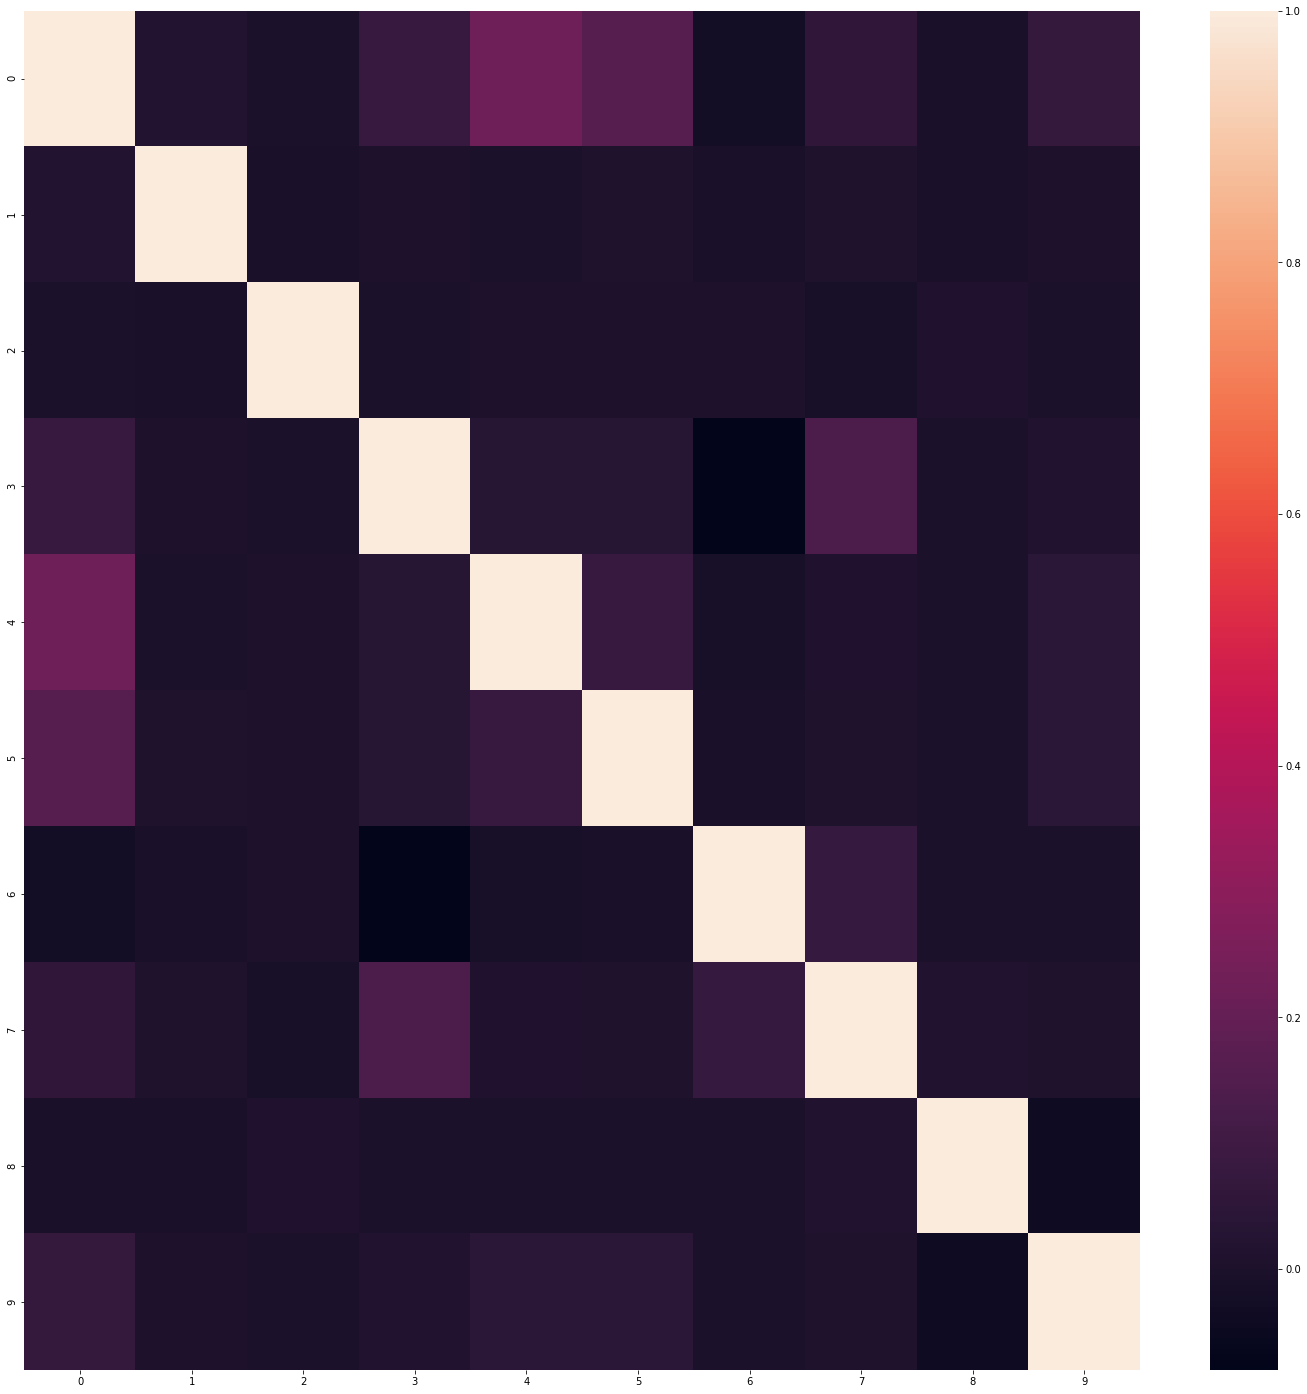

In [55]:
# Correlation matrix of the first 20 principal components
corrmat = np.corrcoef(X.transpose())
# Let's plot the correlation matrix over a heat map
%matplotlib inline
plt.figure(figsize = (25,25))
sns.heatmap(corrmat,annot = False)

In [56]:
# importing train_test_split from sklearn.model_selection library
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [57]:
# Shape of train-test dataframes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(48902, 10)
(48902,)
(20959, 10)
(20959,)


In [58]:
col = X_train.columns

In [59]:
# Handling Class Imbalance
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 2021
Before OverSampling, counts of label '0': 46881 

After OverSampling, the shape of train_X: (93762, 10)
After OverSampling, the shape of train_y: (93762,) 

After OverSampling, counts of label '1': 46881
After OverSampling, counts of label '0': 46881


In [60]:
X_train = pd.DataFrame(data = X_train, columns = col)
X_train.head()

,woe_Age,woe_Education,woe_Gender,woe_Income,woe_Marital Status,woe_No of dependents,woe_No of months in current company,woe_No of months in current residence,woe_Profession,woe_Type of residence
0,-0.028196,0.007916,-0.010159,-0.251234,0.023338,0.005374,-0.122982,-0.241239,-0.028367,-0.004464
1,0.031620,0.007916,-0.010159,-0.251234,-0.004094,-0.010429,0.150759,-0.241239,-0.013323,-0.004464
2,-0.007367,-0.017935,-0.010159,0.234003,0.023338,0.005374,-0.122982,0.203025,-0.028367,-0.004464
3,0.031620,0.007916,-0.010159,-0.110461,-0.004094,0.005374,0.150759,0.203025,-0.028367,-0.004464
4,0.031620,0.007916,-0.010159,-0.110461,0.023338,0.005374,0.021308,0.203025,-0.028367,0.080711


In [61]:
y_train = pd.Series(data=y_train)
y_train

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       1.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
93732    1.0
93733    1.0
93734    1.0
93735    1.0
93736    1.0
93737    1.0
93738    1.0
93739    1.0
93740    1.0
93741    1.0
93742    1.0
93743    1.0
93744    1.0
93745    1.0
93746    1.0
93747    1.0
93748    1.0
93749    1.0
93750    1.0
93751    1.0
93752    1.0
93753    1.0
93754    1.0
93755    1.0
93756    1.0
93757    1.0
93758    1.0
93759    1.0
93760    1.0
93761    1.0
Length: 93762, dtype: float64

In [62]:
# Using stats model for logistic Regression
import statsmodels.api as sm

In [63]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                93762
Model:                            GLM   Df Residuals:                    93751
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63911.
Date:                Mon, 23 Dec 2019   Deviance:                   1.2782e+05
Time:                        17:12:37   Pearson chi2:                 9.38e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.0047      0.007     -0.715      0.475      -0.018       0.008
woe_Age                                  -0.5835      0.282     -2.072      0.038      -1.136      -0.032
woe_Education                            -0.0682      0.336     -0.203      0.839      -0.728       0.591
woe_Gender                               -1.6828      0.375     -4.493      0.000      -2.417      -0.949
woe_Income                                0.7632      0.037     20.493      0.000       0.690       0.836
woe_Marital Status                      -10.1046      0.764    -13.234      0.000     -11.601      -8.608
woe_No of dependents                      5.8009      0.956      6.070      0.000       3.928       7.674
woe_No of months in current company       1.0561      0.063     16.647      0.000       0.932       1.180
woe_No of months in current residence     0.8925      0.030     29.424      0.000       0.833       0.952
woe_Profession                            1.1720      0.140      8.388      0.000       0.898       1.446
woe_Type of residence                     0.9124      0.229      3.977      0.000       0.463       1.362
=========================================================================================================
"""

In [64]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,woe_Age,1.11
4,woe_Marital Status,1.06
3,woe_Income,1.04
5,woe_No of dependents,1.04
7,woe_No of months in current residence,1.04
6,woe_No of months in current company,1.01
8,woe_Profession,1.01
9,woe_Type of residence,1.01
1,woe_Education,1.00
2,woe_Gender,1.00


In [65]:
# Dropping weo_Education
col = X_train.columns
col = col.drop('woe_Education',1)
col

Index(['woe_Age', 'woe_Gender', 'woe_Income', 'woe_Marital Status',
       'woe_No of dependents', 'woe_No of months in current company',
       'woe_No of months in current residence', 'woe_Profession',
       'woe_Type of residence'],
      dtype='object')

In [66]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                93762
Model:                            GLM   Df Residuals:                    93752
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63911.
Date:                Mon, 23 Dec 2019   Deviance:                   1.2782e+05
Time:                        17:12:39   Pearson chi2:                 9.38e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.0047      0.007     -0.712      0.476      -0.018       0.008
woe_Age                                  -0.5840      0.282     -2.073      0.038      -1.136      -0.032
woe_Gender                               -1.6832      0.375     -4.494      0.000      -2.417      -0.949
woe_Income                                0.7631      0.037     20.493      0.000       0.690       0.836
woe_Marital Status                      -10.1039      0.764    -13.233      0.000     -11.600      -8.607
woe_No of dependents                      5.8000      0.956      6.069      0.000       3.927       7.673
woe_No of months in current company       1.0559      0.063     16.645      0.000       0.932       1.180
woe_No of months in current residence     0.8924      0.030     29.424      0.000       0.833       0.952
woe_Profession                            1.1714      0.140      8.385      0.000       0.898       1.445
woe_Type of residence                     0.9122      0.229      3.976      0.000       0.463       1.362
=========================================================================================================
"""

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,woe_Age,1.11
4,woe_Marital Status,1.06
3,woe_Income,1.04
5,woe_No of dependents,1.04
7,woe_No of months in current residence,1.04
6,woe_No of months in current company,1.01
8,woe_Profession,1.01
9,woe_Type of residence,1.01
1,woe_Education,1.00
2,woe_Gender,1.00


In [68]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.320834
1    0.427344
2    0.501162
3    0.570830
4    0.487271
5    0.488028
6    0.577274
7    0.577747
8    0.397769
9    0.446494
dtype: float64

In [69]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.32083381, 0.42734439, 0.50116232, 0.57083023, 0.48727139,
       0.48802816, 0.57727422, 0.57774687, 0.39776864, 0.44649421])

In [70]:
# Creating a dataframe with actual Converted flag and predicted possibilities
y_train_pred_final = pd.DataFrame({'actual_tag':y_train.values, 'performance_prob':y_train_pred})
y_train_pred_final.head()

,actual_tag,performance_prob
0,0.0,0.320834
1,0.0,0.427344
2,0.0,0.501162
3,0.0,0.570830
4,0.0,0.487271


In [71]:
# Creating a new column predicted with if Converted_Prob > 0.5 else 0
y_train_pred_final['pred_tag'] = y_train_pred_final.performance_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,actual_tag,performance_prob,pred_tag
0,0.0,0.320834,0
1,0.0,0.427344,0
2,0.0,0.501162,1
3,0.0,0.570830,1
4,0.0,0.487271,0


In [72]:
# Importing libraries for metric evaluation and hyperparameter tuning
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score

In [73]:
# Let's check the overall aaccuracy.
print(metrics.accuracy_score(y_train_pred_final.actual_tag, y_train_pred_final.pred_tag))

0.5655916042746528


In [74]:
# create onfusion matrix
cm = confusion_matrix(y_train_pred_final['actual_tag'], y_train_pred_final['pred_tag'])
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_pred_final['actual_tag'], y_train_pred_final['pred_tag'], average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
print("AUC:    \t", round(roc_auc_score(y_train_pred_final['actual_tag'], y_train_pred_final['performance_prob']),2))

[[26615 20266]
 [20465 26416]]
Sensitivity: 	0.56
Specificity: 	0.57
AUC:    	 0.59


In [75]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final['actual_tag'], y_train_pred_final['pred_tag']))

              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57     46881
         1.0       0.57      0.56      0.56     46881

    accuracy                           0.57     93762
   macro avg       0.57      0.57      0.57     93762
weighted avg       0.57      0.57      0.57     93762



## Hyperparameter Tuning

In [76]:
# creating a KFold object with 5 splits 
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

In [77]:
# specify range of parameters (C) as a list
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

steps = [("logistic", logistic)]

pca_logistic = Pipeline(steps)

params = {'logistic__C': [0.1, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = pca_logistic, param_grid = params, scoring= 'roc_auc', cv = folds, return_train_score=True)

In [78]:
# fit model
model_cv.fit(X_train[col], y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l2',
                                               

In [79]:
# print best hyperparameters
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)

Best AUC:  0.5876081139579127
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [80]:
# building a Final Model using Penalty = l2 and C =10
model = LogisticRegression(penalty='l2', C=10)

#fit
res = model.fit(X_train[col], y_train)

In [81]:
# Getting the predicted values on the train set
y_train_pred = res.predict_proba(X_train[col])[:, 1]
y_train_pred[:10]

array([0.32336117, 0.42797923, 0.50389493, 0.56943613, 0.48967877,
       0.48666281, 0.57592795, 0.57834142, 0.39666331, 0.44892242])

In [82]:
# Creating a dataframe with actual Converted flag and predicted possibilities
y_train_pred_final = pd.DataFrame({'actual_tag':y_train.values, 'performance_prob':y_train_pred})
y_train_pred_final.head()

,actual_tag,performance_prob
0,0.0,0.323361
1,0.0,0.427979
2,0.0,0.503895
3,0.0,0.569436
4,0.0,0.489679


In [83]:
# Creating a new column predicted with if Converted_Prob > 0.5 else 0
y_train_pred_final['pred_tag'] = y_train_pred_final.performance_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,actual_tag,performance_prob,pred_tag
0,0.0,0.323361,0
1,0.0,0.427979,0
2,0.0,0.503895,1
3,0.0,0.569436,1
4,0.0,0.489679,0


In [84]:
# Let's check the overall aaccuracy.
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.actual_tag, y_train_pred_final.pred_tag))

0.5656875919882255


In [85]:
# create onfusion matrix
cm = confusion_matrix(y_train_pred_final['actual_tag'], y_train_pred_final['pred_tag'])
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_pred_final['actual_tag'], y_train_pred_final['pred_tag'], average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
print("AUC:    \t", round(roc_auc_score(y_train_pred_final['actual_tag'], y_train_pred_final['performance_prob']),2))

[[26540 20341]
 [20381 26500]]
Sensitivity: 	0.57
Specificity: 	0.57
AUC:    	 0.59


In [86]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final['actual_tag'], y_train_pred_final['pred_tag']))

              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57     46881
         1.0       0.57      0.57      0.57     46881

    accuracy                           0.57     93762
   macro avg       0.57      0.57      0.57     93762
weighted avg       0.57      0.57      0.57     93762



## AUC

In [87]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [88]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.actual_tag, y_train_pred_final.performance_prob, drop_intermediate = False)

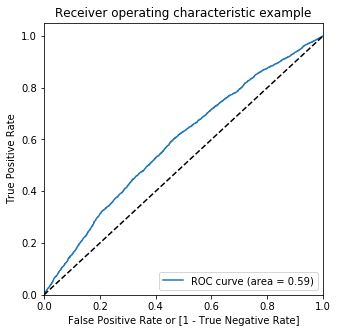

In [89]:
draw_roc(y_train_pred_final.actual_tag, y_train_pred_final.performance_prob)

In [90]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.performance_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,actual_tag,performance_prob,pred_tag,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.323361,0,1,1,1,1,0,0,0,0,0,0
1,0.0,0.427979,0,1,1,1,1,1,0,0,0,0,0
2,0.0,0.503895,1,1,1,1,1,1,1,0,0,0,0
3,0.0,0.569436,1,1,1,1,1,1,1,0,0,0,0
4,0.0,0.489679,0,1,1,1,1,1,0,0,0,0,0


In [91]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.actual_tag, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.500000  1.000000  0.000000
0.2   0.2  0.500000  1.000000  0.000000
0.3   0.3  0.500299  0.999531  0.001067
0.4   0.4  0.522600  0.919498  0.125701
0.5   0.5  0.565688  0.565261  0.566114
0.6   0.6  0.522226  0.122886  0.921567
0.7   0.7  0.500000  0.000000  1.000000
0.8   0.8  0.500000  0.000000  1.000000
0.9   0.9  0.500000  0.000000  1.000000


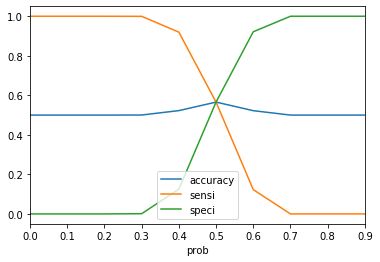

In [92]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

__Looks like we have optimum cutoff at 0.5.__

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final.performance_prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,actual_tag,performance_prob,pred_tag,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.323361,0,1,1,1,1,0,0,0,0,0,0,0
1,0.0,0.427979,0,1,1,1,1,1,0,0,0,0,0,0
2,0.0,0.503895,1,1,1,1,1,1,1,0,0,0,0,1
3,0.0,0.569436,1,1,1,1,1,1,1,0,0,0,0,1
4,0.0,0.489679,0,1,1,1,1,1,0,0,0,0,0,0


In [94]:
# Let's check the overall aaccuracy.
print(metrics.accuracy_score(y_train_pred_final.actual_tag, y_train_pred_final.final_predicted))

0.5656875919882255


In [95]:
# create onfusion matrix
cm = confusion_matrix(y_train_pred_final['actual_tag'], y_train_pred_final['final_predicted'])
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_pred_final['actual_tag'], y_train_pred_final['final_predicted'], average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
print("AUC:    \t", round(roc_auc_score(y_train_pred_final['actual_tag'], y_train_pred_final['performance_prob']),2))

[[26540 20341]
 [20381 26500]]
Sensitivity: 	0.57
Specificity: 	0.57
AUC:    	 0.59


In [96]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final['actual_tag'], y_train_pred_final['final_predicted']))

              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57     46881
         1.0       0.57      0.57      0.57     46881

    accuracy                           0.57     93762
   macro avg       0.57      0.57      0.57     93762
weighted avg       0.57      0.57      0.57     93762



## Precision-Recall Tradeoff

In [97]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.actual_tag, y_train_pred_final.final_predicted

(0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
 5        0.0
 6        0.0
 7        0.0
 8        0.0
 9        0.0
 10       0.0
 11       0.0
 12       0.0
 13       0.0
 14       0.0
 15       0.0
 16       0.0
 17       0.0
 18       0.0
 19       0.0
 20       0.0
 21       0.0
 22       1.0
 23       0.0
 24       0.0
 25       0.0
 26       0.0
 27       0.0
 28       0.0
 29       0.0
         ... 
 93732    1.0
 93733    1.0
 93734    1.0
 93735    1.0
 93736    1.0
 93737    1.0
 93738    1.0
 93739    1.0
 93740    1.0
 93741    1.0
 93742    1.0
 93743    1.0
 93744    1.0
 93745    1.0
 93746    1.0
 93747    1.0
 93748    1.0
 93749    1.0
 93750    1.0
 93751    1.0
 93752    1.0
 93753    1.0
 93754    1.0
 93755    1.0
 93756    1.0
 93757    1.0
 93758    1.0
 93759    1.0
 93760    1.0
 93761    1.0
 Name: actual_tag, Length: 93762, dtype: float64, 0        0
 1        0
 2        1
 3        1
 4        0
 5        0
 6        1
 7        1
 

In [98]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.actual_tag, y_train_pred_final.performance_prob)

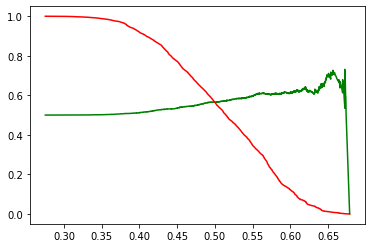

In [99]:
# Plotting precision recall graphs against probabilities
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

__The optimum cutoff for Precision-Recall tradeoff is also 0.5.__

## Demographic Model Evaluation - Predictions on Test Set

In [100]:
X_test = X_test[col]
X_test.head()

,woe_Age,woe_Gender,woe_Income,woe_Marital Status,woe_No of dependents,woe_No of months in current company,woe_No of months in current residence,woe_Profession,woe_Type of residence
63837,-0.007367,0.032211,0.046727,-0.004094,0.005374,-0.073227,0.203025,-0.013323,-0.004464
12030,-0.028196,-0.010159,0.046727,-0.004094,0.005374,0.021308,-0.241239,0.091334,0.004059
25146,0.031620,0.032211,-0.110461,-0.004094,-0.010429,-0.073227,-0.241239,0.091334,-0.004464
30388,-0.028196,-0.010159,0.046727,-0.004094,0.005374,0.021308,-0.241239,-0.028367,-0.004464
6893,-0.007367,-0.010159,-0.110461,-0.004094,0.005374,0.150759,0.203025,-0.013323,-0.004464


In [101]:
# Getting the predicted values on the train set
y_test_pred = res.predict_proba(X_test[col])[:, 1]
y_test_pred[:10]

array([0.53342468, 0.51249228, 0.40918446, 0.47570357, 0.57946781,
       0.54740061, 0.65064785, 0.46390868, 0.38898141, 0.62437086])

In [102]:
# Creating a dataframe with actual Converted flag and predicted possibilities
y_test_pred_final = pd.DataFrame({'actual_tag':y_test.values, 'performance_prob':y_test_pred})
y_test_pred_final.head()

,actual_tag,performance_prob
0,1.0,0.533425
1,0.0,0.512492
2,0.0,0.409184
3,0.0,0.475704
4,0.0,0.579468


In [103]:
# Creating a new column predicted with if Converted_Prob > 0.4 else 0
y_test_pred_final['pred_tag'] = y_test_pred_final.performance_prob.map(lambda x: 1 if x > 0.53 else 0)
y_test_pred_final.head()

,actual_tag,performance_prob,pred_tag
0,1.0,0.533425,1
1,0.0,0.512492,0
2,0.0,0.409184,0
3,0.0,0.475704,0
4,0.0,0.579468,1


In [104]:
# create onfusion matrix
cm = confusion_matrix(y_test_pred_final['actual_tag'], y_test_pred_final['pred_tag'])
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_pred_final['actual_tag'], y_test_pred_final['pred_tag'], average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


# check area under curve
print("AUC:    \t", round(roc_auc_score(y_test_pred_final['actual_tag'], y_test_pred_final['performance_prob']),2))

[[13573  6460]
 [  519   407]]
Sensitivity: 	0.44
Specificity: 	0.68
AUC:    	 0.57


In [105]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test_pred_final['actual_tag'],y_test_pred_final['pred_tag']))

              precision    recall  f1-score   support

         0.0       0.96      0.68      0.80     20033
         1.0       0.06      0.44      0.10       926

    accuracy                           0.67     20959
   macro avg       0.51      0.56      0.45     20959
weighted avg       0.92      0.67      0.76     20959



__We can observe that the overall accuracy is around 0.57 and sensitivity is around 0.44. Thus, we can say that the demographic data has got decent predictive power but the sensitivity and accuracy needs to be better. Let's find out how the metrics do on the overall dataset.__

## Model Building - Overall Dataset

In [106]:
X = woe_df.drop(['Application ID','Performance Tag'], axis=1)
y = woe_df['Performance Tag']

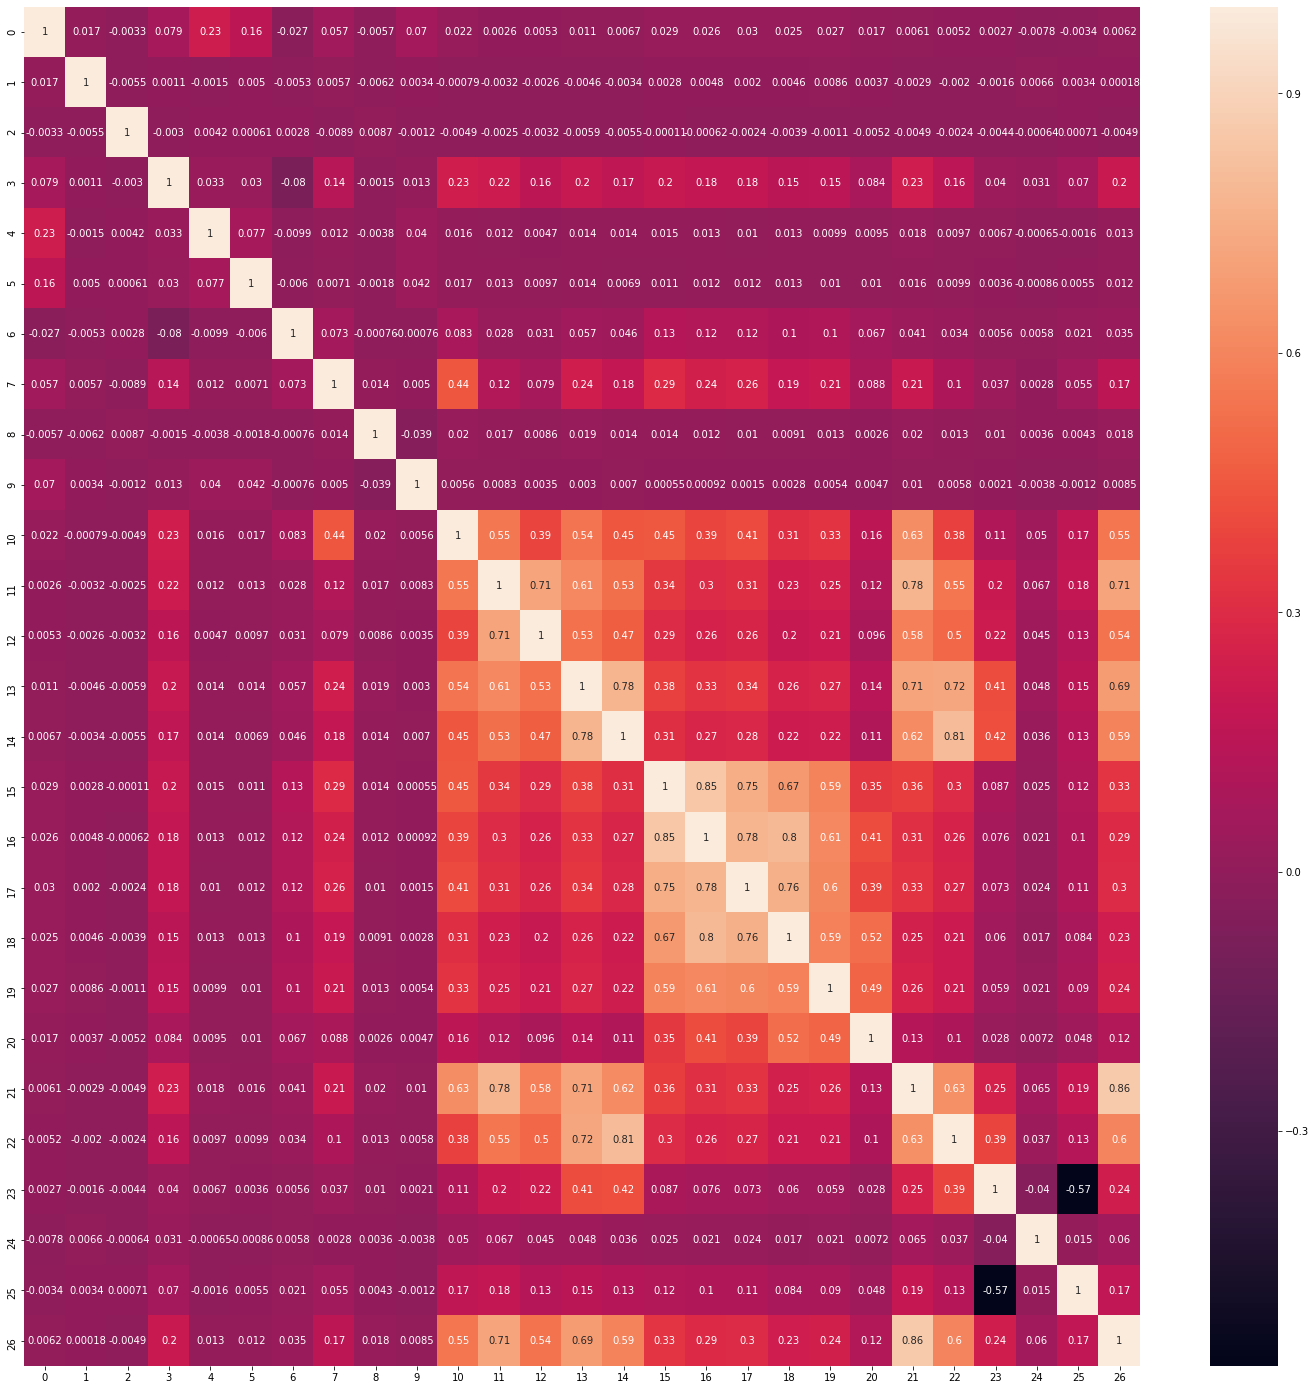

In [107]:
# Correlation matrix 
corrmat = np.corrcoef(X.transpose())
# Let's plot the correlation matrix over a heat map
%matplotlib inline
plt.figure(figsize = (25,25))
sns.heatmap(corrmat,annot = True)

In [108]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.8606589005685317 , min corr:  -0.571450314546245


In [109]:
# importing train_test_split from sklearn.model_selection library
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [110]:
# Shape of train-test dataframes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(48902, 27)
(48902,)
(20959, 27)
(20959,)


In [111]:
col = X_train.columns

In [112]:
# Handling Class Imbalance
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 2021
Before OverSampling, counts of label '0': 46881 

After OverSampling, the shape of train_X: (93762, 27)
After OverSampling, the shape of train_y: (93762,) 

After OverSampling, counts of label '1': 46881
After OverSampling, counts of label '0': 46881


In [113]:
X_train = pd.DataFrame(data = X_train, columns = col)
X_train.head()

,woe_Age,woe_Education,woe_Gender,woe_Income,woe_Marital Status,woe_No of dependents,woe_No of months in current company,woe_No of months in current residence,woe_Profession,woe_Type of residence,...,woe_No of times 60 DPD or worse in last 12 months,woe_No of times 60 DPD or worse in last 6 months,woe_No of times 90 DPD or worse in last 12 months,woe_No of times 90 DPD or worse in last 6 months,woe_No of trades opened in last 12 months,woe_No of trades opened in last 6 months,woe_Outstanding Balance,woe_Presence of open auto loan,woe_Presence of open home loan,woe_Total No of Trades
0,-0.028196,0.007916,-0.010159,-0.251234,0.023338,0.005374,-0.122982,-0.241239,-0.028367,-0.004464,...,-0.200628,-0.121396,-0.133612,-0.036826,0.228323,-0.270769,-0.096418,0.011973,0.073722,0.277181
1,0.031620,0.007916,-0.010159,-0.251234,-0.004094,-0.010429,0.150759,-0.241239,-0.013323,-0.004464,...,-0.200628,-0.121396,-0.133612,-0.036826,-0.865089,-0.270769,0.088938,0.011973,-0.236703,-0.686175
2,-0.007367,-0.017935,-0.010159,0.234003,0.023338,0.005374,-0.122982,0.203025,-0.028367,-0.004464,...,0.694138,0.743374,0.722079,-0.036826,0.228323,0.354912,0.088938,0.011973,-0.236703,0.277181
3,0.031620,0.007916,-0.010159,-0.110461,-0.004094,0.005374,0.150759,0.203025,-0.028367,-0.004464,...,0.694138,0.743374,-0.133612,-0.036826,0.368415,0.354912,0.088938,0.011973,-0.236703,0.277380
4,0.031620,0.007916,-0.010159,-0.110461,0.023338,0.005374,0.021308,0.203025,-0.028367,0.080711,...,-0.200628,-0.121396,-0.133612,-0.036826,-0.865089,-0.270769,0.088938,0.011973,-0.236703,-0.686175


In [114]:
y_train = pd.Series(data=y_train)
y_train

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       1.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
93732    1.0
93733    1.0
93734    1.0
93735    1.0
93736    1.0
93737    1.0
93738    1.0
93739    1.0
93740    1.0
93741    1.0
93742    1.0
93743    1.0
93744    1.0
93745    1.0
93746    1.0
93747    1.0
93748    1.0
93749    1.0
93750    1.0
93751    1.0
93752    1.0
93753    1.0
93754    1.0
93755    1.0
93756    1.0
93757    1.0
93758    1.0
93759    1.0
93760    1.0
93761    1.0
Length: 93762, dtype: float64

## Logistic Regression

In [115]:
# Using stats model for logistic Regression
import statsmodels.api as sm

In [116]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                93762
Model:                            GLM   Df Residuals:                    93734
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60084.
Date:                Mon, 23 Dec 2019   Deviance:                   1.2017e+05
Time:                        17:13:44   Pearson chi2:                 9.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  -0.0116      0.007     -1.669      0.095      -0.025       0.002
woe_Age                                                                -0.4726      0.314     -1.506      0.132      -1.088       0.142
woe_Education                                                          -1.1320      0.372     -3.039      0.002      -1.862      -0.402
woe_Gender                                                             -1.0021      0.418     -2.400      0.016      -1.821      -0.184
woe_Income                                                             -0.1360      0.042     -3.252      0.001      -0.218      -0.054
woe_Marital Status                                                     -1.5960      0.796     -2.006      0.045      -3.155      -0.037
woe_No of dependents                                                   -0.6457      1.022     -0.632      0.527      -2.648       1.357
woe_No of months in current company                                     0.3948      0.071      5.544      0.000       0.255       0.534
woe_No of months in current residence                                  -0.0043      0.037     -0.116      0.908      -0.077       0.068
woe_Profession                                                          0.3908      0.159      2.458      0.014       0.079       0.702
woe_Type of residence                                                   1.5516      0.261      5.952      0.000       1.041       2.063
woe_Avgas CC Utilization in last 12 months                              0.4933      0.018     26.889      0.000       0.457       0.529
woe_No of Inquiries in last 12 months (excluding home & auto loans)     0.4641      0.025     18.542      0.000       0.415       0.513
woe_No of Inquiries in last 6 months (excluding home & auto loans)     -0.2369      0.031     -7.592      0.000      -0.298      -0.176
woe_No of PL trades opened in last 12 months                            0.1368      0.030      4.530      0.000       0.078       0.196
woe_No of PL trades opened in last 6 months                             0.1803      0.037      4.880      0.000       0.108       0.253
woe_No of times 30 DPD or worse in last 12 months                       0.1731      0.032      5.412      0.000       0.110       0.236
woe_No of times 30 DPD or worse in last 6 months                        0.2330      0.042      5.610      0.000       0.152       0.314
woe_No of times 60 DPD or worse in last 12 months                       0.0311      0.033      0.931      0.352      -0.034       0.096
woe_No of times 60 DPD or worse in last 6 months                       -0.0081      0.043  

In [117]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,woe_No of trades opened in last 12 months,5.60
16,woe_No of times 30 DPD or worse in last 6 months,5.54
15,woe_No of times 30 DPD or worse in last 12 months,4.32
26,woe_Total No of Trades,4.10
14,woe_No of PL trades opened in last 6 months,3.79
13,woe_No of PL trades opened in last 12 months,3.60
18,woe_No of times 60 DPD or worse in last 6 months,3.54
17,woe_No of times 60 DPD or worse in last 12 months,3.40
22,woe_No of trades opened in last 6 months,3.29
11,woe_No of Inquiries in last 12 months (excludi...,3.23


In [118]:
# Dropping 
col = X_train.columns
col = col.drop('woe_No of times 60 DPD or worse in last 6 months',1)
col

Index(['woe_Age', 'woe_Education', 'woe_Gender', 'woe_Income',
       'woe_Marital Status', 'woe_No of dependents',
       'woe_No of months in current company',
       'woe_No of months in current residence', 'woe_Profession',
       'woe_Type of residence', 'woe_Avgas CC Utilization in last 12 months',
       'woe_No of Inquiries in last 12 months (excluding home & auto loans)',
       'woe_No of Inquiries in last 6 months (excluding home & auto loans)',
       'woe_No of PL trades opened in last 12 months',
       'woe_No of PL trades opened in last 6 months',
       'woe_No of times 30 DPD or worse in last 12 months',
       'woe_No of times 30 DPD or worse in last 6 months',
       'woe_No of times 60 DPD or worse in last 12 months',
       'woe_No of times 90 DPD or worse in last 12 months',
       'woe_No of times 90 DPD or worse in last 6 months',
       'woe_No of trades opened in last 12 months',
       'woe_No of trades opened in last 6 months', 'woe_Outstanding Balance',
  

In [119]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                93762
Model:                            GLM   Df Residuals:                    93735
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60084.
Date:                Mon, 23 Dec 2019   Deviance:                   1.2017e+05
Time:                        17:14:00   Pearson chi2:                 9.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  -0.0116      0.007     -1.671      0.095      -0.025       0.002
woe_Age                                                                -0.4720      0.314     -1.505      0.132      -1.087       0.143
woe_Education                                                          -1.1333      0.372     -3.043      0.002      -1.863      -0.403
woe_Gender                                                             -1.0021      0.418     -2.400      0.016      -1.821      -0.184
woe_Income                                                             -0.1360      0.042     -3.252      0.001      -0.218      -0.054
woe_Marital Status                                                     -1.5961      0.796     -2.006      0.045      -3.155      -0.037
woe_No of dependents                                                   -0.6477      1.022     -0.634      0.526      -2.650       1.355
woe_No of months in current company                                     0.3949      0.071      5.545      0.000       0.255       0.534
woe_No of months in current residence                                  -0.0040      0.037     -0.109      0.913      -0.077       0.069
woe_Profession                                                          0.3911      0.159      2.460      0.014       0.080       0.703
woe_Type of residence                                                   1.5511      0.261      5.950      0.000       1.040       2.062
woe_Avgas CC Utilization in last 12 months                              0.4933      0.018     26.895      0.000       0.457       0.529
woe_No of Inquiries in last 12 months (excluding home & auto loans)     0.4641      0.025     18.544      0.000       0.415       0.513
woe_No of Inquiries in last 6 months (excluding home & auto loans)     -0.2368      0.031     -7.591      0.000      -0.298      -0.176
woe_No of PL trades opened in last 12 months                            0.1369      0.030      4.533      0.000       0.078       0.196
woe_No of PL trades opened in last 6 months                             0.1803      0.037      4.879      0.000       0.108       0.253
woe_No of times 30 DPD or worse in last 12 months                       0.1736      0.032      5.450      0.000       0.111       0.236
woe_No of times 30 DPD or worse in last 6 months                        0.2297      0.038      6.095      0.000       0.156       0.304
woe_No of times 60 DPD or worse in last 12 months                       0.0287      0.031      0.927      0.354      -0.032       0.089
woe_No of times 90 DPD or worse in last 12 months                       0.0910      0.031  

In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,woe_No of trades opened in last 12 months,5.60
16,woe_No of times 30 DPD or worse in last 6 months,4.62
15,woe_No of times 30 DPD or worse in last 12 months,4.28
25,woe_Total No of Trades,4.10
14,woe_No of PL trades opened in last 6 months,3.79
13,woe_No of PL trades opened in last 12 months,3.60
21,woe_No of trades opened in last 6 months,3.29
11,woe_No of Inquiries in last 12 months (excludi...,3.23
17,woe_No of times 60 DPD or worse in last 12 months,2.91
22,woe_Outstanding Balance,2.51


In [121]:
# Dropping 
col = col.drop('woe_No of dependents',1)
col

Index(['woe_Age', 'woe_Education', 'woe_Gender', 'woe_Income',
       'woe_Marital Status', 'woe_No of months in current company',
       'woe_No of months in current residence', 'woe_Profession',
       'woe_Type of residence', 'woe_Avgas CC Utilization in last 12 months',
       'woe_No of Inquiries in last 12 months (excluding home & auto loans)',
       'woe_No of Inquiries in last 6 months (excluding home & auto loans)',
       'woe_No of PL trades opened in last 12 months',
       'woe_No of PL trades opened in last 6 months',
       'woe_No of times 30 DPD or worse in last 12 months',
       'woe_No of times 30 DPD or worse in last 6 months',
       'woe_No of times 60 DPD or worse in last 12 months',
       'woe_No of times 90 DPD or worse in last 12 months',
       'woe_No of times 90 DPD or worse in last 6 months',
       'woe_No of trades opened in last 12 months',
       'woe_No of trades opened in last 6 months', 'woe_Outstanding Balance',
       'woe_Presence of open auto

In [122]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                93762
Model:                            GLM   Df Residuals:                    93736
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60085.
Date:                Mon, 23 Dec 2019   Deviance:                   1.2017e+05
Time:                        17:14:16   Pearson chi2:                 9.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  -0.0116      0.007     -1.672      0.095      -0.025       0.002
woe_Age                                                                -0.5004      0.311     -1.612      0.107      -1.109       0.108
woe_Education                                                          -1.1348      0.372     -3.047      0.002      -1.865      -0.405
woe_Gender                                                             -1.0044      0.418     -2.405      0.016      -1.823      -0.186
woe_Income                                                             -0.1361      0.042     -3.253      0.001      -0.218      -0.054
woe_Marital Status                                                     -1.6199      0.795     -2.038      0.042      -3.177      -0.062
woe_No of months in current company                                     0.3954      0.071      5.553      0.000       0.256       0.535
woe_No of months in current residence                                  -0.0034      0.037     -0.090      0.928      -0.076       0.069
woe_Profession                                                          0.3913      0.159      2.461      0.014       0.080       0.703
woe_Type of residence                                                   1.5441      0.260      5.930      0.000       1.034       2.054
woe_Avgas CC Utilization in last 12 months                              0.4933      0.018     26.893      0.000       0.457       0.529
woe_No of Inquiries in last 12 months (excluding home & auto loans)     0.4644      0.025     18.557      0.000       0.415       0.513
woe_No of Inquiries in last 6 months (excluding home & auto loans)     -0.2369      0.031     -7.592      0.000      -0.298      -0.176
woe_No of PL trades opened in last 12 months                            0.1368      0.030      4.531      0.000       0.078       0.196
woe_No of PL trades opened in last 6 months                             0.1799      0.037      4.870      0.000       0.108       0.252
woe_No of times 30 DPD or worse in last 12 months                       0.1735      0.032      5.447      0.000       0.111       0.236
woe_No of times 30 DPD or worse in last 6 months                        0.2299      0.038      6.099      0.000       0.156       0.304
woe_No of times 60 DPD or worse in last 12 months                       0.0287      0.031      0.928      0.354      -0.032       0.089
woe_No of times 90 DPD or worse in last 12 months                       0.0907      0.031      2.954      0.003       0.031       0.151
woe_No of times 90 DPD or worse in last 6 months                        0.0803      0.047  

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,woe_No of trades opened in last 12 months,5.60
15,woe_No of times 30 DPD or worse in last 6 months,4.62
14,woe_No of times 30 DPD or worse in last 12 months,4.28
24,woe_Total No of Trades,4.10
13,woe_No of PL trades opened in last 6 months,3.79
12,woe_No of PL trades opened in last 12 months,3.60
20,woe_No of trades opened in last 6 months,3.29
10,woe_No of Inquiries in last 12 months (excludi...,3.23
16,woe_No of times 60 DPD or worse in last 12 months,2.91
21,woe_Outstanding Balance,2.51


In [124]:
# Dropping 
col = col.drop('woe_No of months in current residence',1)
col

Index(['woe_Age', 'woe_Education', 'woe_Gender', 'woe_Income',
       'woe_Marital Status', 'woe_No of months in current company',
       'woe_Profession', 'woe_Type of residence',
       'woe_Avgas CC Utilization in last 12 months',
       'woe_No of Inquiries in last 12 months (excluding home & auto loans)',
       'woe_No of Inquiries in last 6 months (excluding home & auto loans)',
       'woe_No of PL trades opened in last 12 months',
       'woe_No of PL trades opened in last 6 months',
       'woe_No of times 30 DPD or worse in last 12 months',
       'woe_No of times 30 DPD or worse in last 6 months',
       'woe_No of times 60 DPD or worse in last 12 months',
       'woe_No of times 90 DPD or worse in last 12 months',
       'woe_No of times 90 DPD or worse in last 6 months',
       'woe_No of trades opened in last 12 months',
       'woe_No of trades opened in last 6 months', 'woe_Outstanding Balance',
       'woe_Presence of open auto loan', 'woe_Presence of open home loan',

In [125]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                93762
Model:                            GLM   Df Residuals:                    93737
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60085.
Date:                Mon, 23 Dec 2019   Deviance:                   1.2017e+05
Time:                        17:14:30   Pearson chi2:                 9.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  -0.0116      0.007     -1.673      0.094      -0.025       0.002
woe_Age                                                                -0.5012      0.310     -1.615      0.106      -1.110       0.107
woe_Education                                                          -1.1353      0.372     -3.049      0.002      -1.865      -0.405
woe_Gender                                                             -1.0042      0.418     -2.405      0.016      -1.823      -0.186
woe_Income                                                             -0.1364      0.042     -3.270      0.001      -0.218      -0.055
woe_Marital Status                                                     -1.6196      0.795     -2.038      0.042      -3.177      -0.062
woe_No of months in current company                                     0.3951      0.071      5.555      0.000       0.256       0.535
woe_Profession                                                          0.3914      0.159      2.462      0.014       0.080       0.703
woe_Type of residence                                                   1.5438      0.260      5.930      0.000       1.033       2.054
woe_Avgas CC Utilization in last 12 months                              0.4927      0.017     28.939      0.000       0.459       0.526
woe_No of Inquiries in last 12 months (excluding home & auto loans)     0.4646      0.025     18.664      0.000       0.416       0.513
woe_No of Inquiries in last 6 months (excluding home & auto loans)     -0.2368      0.031     -7.592      0.000      -0.298      -0.176
woe_No of PL trades opened in last 12 months                            0.1366      0.030      4.536      0.000       0.078       0.196
woe_No of PL trades opened in last 6 months                             0.1798      0.037      4.872      0.000       0.107       0.252
woe_No of times 30 DPD or worse in last 12 months                       0.1734      0.032      5.451      0.000       0.111       0.236
woe_No of times 30 DPD or worse in last 6 months                        0.2299      0.038      6.101      0.000       0.156       0.304
woe_No of times 60 DPD or worse in last 12 months                       0.0287      0.031      0.926      0.355      -0.032       0.089
woe_No of times 90 DPD or worse in last 12 months                       0.0906      0.031      2.952      0.003       0.030       0.151
woe_No of times 90 DPD or worse in last 6 months                        0.0806      0.047      1.731      0.083      -0.011       0.172
woe_No of trades opened in last 12 months                               0.3905      0.031  

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,woe_No of trades opened in last 12 months,5.59
14,woe_No of times 30 DPD or worse in last 6 months,4.62
13,woe_No of times 30 DPD or worse in last 12 months,4.27
23,woe_Total No of Trades,4.10
12,woe_No of PL trades opened in last 6 months,3.78
11,woe_No of PL trades opened in last 12 months,3.58
19,woe_No of trades opened in last 6 months,3.27
9,woe_No of Inquiries in last 12 months (excludi...,3.20
15,woe_No of times 60 DPD or worse in last 12 months,2.91
20,woe_Outstanding Balance,2.51


In [127]:
# Dropping 
col = col.drop('woe_Outstanding Balance',1)
col

Index(['woe_Age', 'woe_Education', 'woe_Gender', 'woe_Income',
       'woe_Marital Status', 'woe_No of months in current company',
       'woe_Profession', 'woe_Type of residence',
       'woe_Avgas CC Utilization in last 12 months',
       'woe_No of Inquiries in last 12 months (excluding home & auto loans)',
       'woe_No of Inquiries in last 6 months (excluding home & auto loans)',
       'woe_No of PL trades opened in last 12 months',
       'woe_No of PL trades opened in last 6 months',
       'woe_No of times 30 DPD or worse in last 12 months',
       'woe_No of times 30 DPD or worse in last 6 months',
       'woe_No of times 60 DPD or worse in last 12 months',
       'woe_No of times 90 DPD or worse in last 12 months',
       'woe_No of times 90 DPD or worse in last 6 months',
       'woe_No of trades opened in last 12 months',
       'woe_No of trades opened in last 6 months',
       'woe_Presence of open auto loan', 'woe_Presence of open home loan',
       'woe_Total No of Tr

In [128]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                93762
Model:                            GLM   Df Residuals:                    93738
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60085.
Date:                Mon, 23 Dec 2019   Deviance:                   1.2017e+05
Time:                        17:14:43   Pearson chi2:                 9.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  -0.0117      0.007     -1.690      0.091      -0.025       0.002
woe_Age                                                                -0.4930      0.310     -1.589      0.112      -1.101       0.115
woe_Education                                                          -1.1398      0.372     -3.061      0.002      -1.870      -0.410
woe_Gender                                                             -1.0067      0.418     -2.411      0.016      -1.825      -0.188
woe_Income                                                             -0.1372      0.042     -3.290      0.001      -0.219      -0.055
woe_Marital Status                                                     -1.6180      0.795     -2.036      0.042      -3.175      -0.060
woe_No of months in current company                                     0.3964      0.071      5.574      0.000       0.257       0.536
woe_Profession                                                          0.3938      0.159      2.477      0.013       0.082       0.705
woe_Type of residence                                                   1.5438      0.260      5.930      0.000       1.034       2.054
woe_Avgas CC Utilization in last 12 months                              0.4951      0.017     29.254      0.000       0.462       0.528
woe_No of Inquiries in last 12 months (excluding home & auto loans)     0.4651      0.025     18.687      0.000       0.416       0.514
woe_No of Inquiries in last 6 months (excluding home & auto loans)     -0.2385      0.031     -7.654      0.000      -0.300      -0.177
woe_No of PL trades opened in last 12 months                            0.1252      0.029      4.352      0.000       0.069       0.182
woe_No of PL trades opened in last 6 months                             0.1719      0.036      4.725      0.000       0.101       0.243
woe_No of times 30 DPD or worse in last 12 months                       0.1738      0.032      5.465      0.000       0.111       0.236
woe_No of times 30 DPD or worse in last 6 months                        0.2290      0.038      6.077      0.000       0.155       0.303
woe_No of times 60 DPD or worse in last 12 months                       0.0305      0.031      0.985      0.325      -0.030       0.091
woe_No of times 90 DPD or worse in last 12 months                       0.0913      0.031      2.978      0.003       0.031       0.151
woe_No of times 90 DPD or worse in last 6 months                        0.0795      0.047      1.708      0.088      -0.012       0.171
woe_No of trades opened in last 12 months                               0.3883      0.031  

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,woe_No of trades opened in last 12 months,5.58
14,woe_No of times 30 DPD or worse in last 6 months,4.61
13,woe_No of times 30 DPD or worse in last 12 months,4.27
22,woe_Total No of Trades,4.08
12,woe_No of PL trades opened in last 6 months,3.68
11,woe_No of PL trades opened in last 12 months,3.28
19,woe_No of trades opened in last 6 months,3.22
9,woe_No of Inquiries in last 12 months (excludi...,3.19
15,woe_No of times 60 DPD or worse in last 12 months,2.90
10,woe_No of Inquiries in last 6 months (excludin...,1.96


In [130]:
# Dropping 
col = col.drop('woe_No of times 60 DPD or worse in last 12 months',1)
col

Index(['woe_Age', 'woe_Education', 'woe_Gender', 'woe_Income',
       'woe_Marital Status', 'woe_No of months in current company',
       'woe_Profession', 'woe_Type of residence',
       'woe_Avgas CC Utilization in last 12 months',
       'woe_No of Inquiries in last 12 months (excluding home & auto loans)',
       'woe_No of Inquiries in last 6 months (excluding home & auto loans)',
       'woe_No of PL trades opened in last 12 months',
       'woe_No of PL trades opened in last 6 months',
       'woe_No of times 30 DPD or worse in last 12 months',
       'woe_No of times 30 DPD or worse in last 6 months',
       'woe_No of times 90 DPD or worse in last 12 months',
       'woe_No of times 90 DPD or worse in last 6 months',
       'woe_No of trades opened in last 12 months',
       'woe_No of trades opened in last 6 months',
       'woe_Presence of open auto loan', 'woe_Presence of open home loan',
       'woe_Total No of Trades'],
      dtype='object')

In [131]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                93762
Model:                            GLM   Df Residuals:                    93739
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60086.
Date:                Mon, 23 Dec 2019   Deviance:                   1.2017e+05
Time:                        17:14:55   Pearson chi2:                 9.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  -0.0117      0.007     -1.690      0.091      -0.025       0.002
woe_Age                                                                -0.4828      0.310     -1.557      0.120      -1.091       0.125
woe_Education                                                          -1.1382      0.372     -3.057      0.002      -1.868      -0.408
woe_Gender                                                             -1.0002      0.418     -2.396      0.017      -1.819      -0.182
woe_Income                                                             -0.1368      0.042     -3.280      0.001      -0.219      -0.055
woe_Marital Status                                                     -1.6285      0.795     -2.049      0.040      -3.186      -0.071
woe_No of months in current company                                     0.3991      0.071      5.615      0.000       0.260       0.538
woe_Profession                                                          0.3963      0.159      2.493      0.013       0.085       0.708
woe_Type of residence                                                   1.5489      0.260      5.949      0.000       1.039       2.059
woe_Avgas CC Utilization in last 12 months                              0.4964      0.017     29.422      0.000       0.463       0.529
woe_No of Inquiries in last 12 months (excluding home & auto loans)     0.4650      0.025     18.681      0.000       0.416       0.514
woe_No of Inquiries in last 6 months (excluding home & auto loans)     -0.2378      0.031     -7.632      0.000      -0.299      -0.177
woe_No of PL trades opened in last 12 months                            0.1254      0.029      4.358      0.000       0.069       0.182
woe_No of PL trades opened in last 6 months                             0.1716      0.036      4.717      0.000       0.100       0.243
woe_No of times 30 DPD or worse in last 12 months                       0.1798      0.031      5.756      0.000       0.119       0.241
woe_No of times 30 DPD or worse in last 6 months                        0.2413      0.036      6.792      0.000       0.172       0.311
woe_No of times 90 DPD or worse in last 12 months                       0.0978      0.030      3.267      0.001       0.039       0.157
woe_No of times 90 DPD or worse in last 6 months                        0.0823      0.046      1.771      0.077      -0.009       0.173
woe_No of trades opened in last 12 months                               0.3884      0.031     12.475      0.000       0.327       0.449
woe_No of trades opened in last 6 months                               -0.1315      0.039  

In [132]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,woe_No of trades opened in last 12 months,5.58
13,woe_No of times 30 DPD or worse in last 12 months,4.12
14,woe_No of times 30 DPD or worse in last 6 months,4.11
21,woe_Total No of Trades,4.08
12,woe_No of PL trades opened in last 6 months,3.68
11,woe_No of PL trades opened in last 12 months,3.28
18,woe_No of trades opened in last 6 months,3.22
9,woe_No of Inquiries in last 12 months (excludi...,3.19
10,woe_No of Inquiries in last 6 months (excludin...,1.96
8,woe_Avgas CC Utilization in last 12 months,1.86


In [133]:
# Dropping 
col = col.drop('woe_No of times 90 DPD or worse in last 6 months',1)
col

Index(['woe_Age', 'woe_Education', 'woe_Gender', 'woe_Income',
       'woe_Marital Status', 'woe_No of months in current company',
       'woe_Profession', 'woe_Type of residence',
       'woe_Avgas CC Utilization in last 12 months',
       'woe_No of Inquiries in last 12 months (excluding home & auto loans)',
       'woe_No of Inquiries in last 6 months (excluding home & auto loans)',
       'woe_No of PL trades opened in last 12 months',
       'woe_No of PL trades opened in last 6 months',
       'woe_No of times 30 DPD or worse in last 12 months',
       'woe_No of times 30 DPD or worse in last 6 months',
       'woe_No of times 90 DPD or worse in last 12 months',
       'woe_No of trades opened in last 12 months',
       'woe_No of trades opened in last 6 months',
       'woe_Presence of open auto loan', 'woe_Presence of open home loan',
       'woe_Total No of Trades'],
      dtype='object')

In [134]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                93762
Model:                            GLM   Df Residuals:                    93740
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60087.
Date:                Mon, 23 Dec 2019   Deviance:                   1.2017e+05
Time:                        17:15:07   Pearson chi2:                 9.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  -0.0117      0.007     -1.689      0.091      -0.025       0.002
woe_Age                                                                -0.4783      0.310     -1.542      0.123      -1.086       0.130
woe_Education                                                          -1.1327      0.372     -3.043      0.002      -1.862      -0.403
woe_Gender                                                             -1.0180      0.417     -2.439      0.015      -1.836      -0.200
woe_Income                                                             -0.1337      0.042     -3.210      0.001      -0.215      -0.052
woe_Marital Status                                                     -1.6518      0.795     -2.079      0.038      -3.209      -0.095
woe_No of months in current company                                     0.3999      0.071      5.627      0.000       0.261       0.539
woe_Profession                                                          0.3967      0.159      2.495      0.013       0.085       0.708
woe_Type of residence                                                   1.5459      0.260      5.938      0.000       1.036       2.056
woe_Avgas CC Utilization in last 12 months                              0.4953      0.017     29.377      0.000       0.462       0.528
woe_No of Inquiries in last 12 months (excluding home & auto loans)     0.4649      0.025     18.679      0.000       0.416       0.514
woe_No of Inquiries in last 6 months (excluding home & auto loans)     -0.2394      0.031     -7.688      0.000      -0.300      -0.178
woe_No of PL trades opened in last 12 months                            0.1272      0.029      4.426      0.000       0.071       0.184
woe_No of PL trades opened in last 6 months                             0.1721      0.036      4.730      0.000       0.101       0.243
woe_No of times 30 DPD or worse in last 12 months                       0.1772      0.031      5.680      0.000       0.116       0.238
woe_No of times 30 DPD or worse in last 6 months                        0.2505      0.035      7.124      0.000       0.182       0.319
woe_No of times 90 DPD or worse in last 12 months                       0.1159      0.028      4.109      0.000       0.061       0.171
woe_No of trades opened in last 12 months                               0.3884      0.031     12.473      0.000       0.327       0.449
woe_No of trades opened in last 6 months                               -0.1336      0.039     -3.405      0.001      -0.211      -0.057
woe_Presence of open auto loan                                          1.6364      0.191  

In [135]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,woe_No of trades opened in last 12 months,5.58
13,woe_No of times 30 DPD or worse in last 12 months,4.11
20,woe_Total No of Trades,4.08
14,woe_No of times 30 DPD or worse in last 6 months,4.02
12,woe_No of PL trades opened in last 6 months,3.68
11,woe_No of PL trades opened in last 12 months,3.28
17,woe_No of trades opened in last 6 months,3.22
9,woe_No of Inquiries in last 12 months (excludi...,3.19
10,woe_No of Inquiries in last 6 months (excludin...,1.96
8,woe_Avgas CC Utilization in last 12 months,1.86


In [136]:
# Dropping 
col = col.drop('woe_No of trades opened in last 12 months',1)
col

Index(['woe_Age', 'woe_Education', 'woe_Gender', 'woe_Income',
       'woe_Marital Status', 'woe_No of months in current company',
       'woe_Profession', 'woe_Type of residence',
       'woe_Avgas CC Utilization in last 12 months',
       'woe_No of Inquiries in last 12 months (excluding home & auto loans)',
       'woe_No of Inquiries in last 6 months (excluding home & auto loans)',
       'woe_No of PL trades opened in last 12 months',
       'woe_No of PL trades opened in last 6 months',
       'woe_No of times 30 DPD or worse in last 12 months',
       'woe_No of times 30 DPD or worse in last 6 months',
       'woe_No of times 90 DPD or worse in last 12 months',
       'woe_No of trades opened in last 6 months',
       'woe_Presence of open auto loan', 'woe_Presence of open home loan',
       'woe_Total No of Trades'],
      dtype='object')

In [137]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                93762
Model:                            GLM   Df Residuals:                    93741
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60166.
Date:                Mon, 23 Dec 2019   Deviance:                   1.2033e+05
Time:                        17:15:17   Pearson chi2:                 9.37e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  -0.0113      0.007     -1.635      0.102      -0.025       0.002
woe_Age                                                                -0.5080      0.310     -1.640      0.101      -1.115       0.099
woe_Education                                                          -1.1372      0.372     -3.055      0.002      -1.867      -0.408
woe_Gender                                                             -1.0698      0.417     -2.566      0.010      -1.887      -0.253
woe_Income                                                             -0.1161      0.042     -2.790      0.005      -0.198      -0.035
woe_Marital Status                                                     -1.7646      0.794     -2.223      0.026      -3.320      -0.209
woe_No of months in current company                                     0.3953      0.071      5.568      0.000       0.256       0.534
woe_Profession                                                          0.4293      0.159      2.703      0.007       0.118       0.741
woe_Type of residence                                                   1.5798      0.260      6.071      0.000       1.070       2.090
woe_Avgas CC Utilization in last 12 months                              0.5447      0.016     33.204      0.000       0.513       0.577
woe_No of Inquiries in last 12 months (excluding home & auto loans)     0.5637      0.024     23.912      0.000       0.517       0.610
woe_No of Inquiries in last 6 months (excluding home & auto loans)     -0.2535      0.031     -8.147      0.000      -0.314      -0.193
woe_No of PL trades opened in last 12 months                            0.1642      0.029      5.738      0.000       0.108       0.220
woe_No of PL trades opened in last 6 months                             0.1752      0.036      4.806      0.000       0.104       0.247
woe_No of times 30 DPD or worse in last 12 months                       0.1711      0.031      5.482      0.000       0.110       0.232
woe_No of times 30 DPD or worse in last 6 months                        0.2556      0.035      7.264      0.000       0.187       0.325
woe_No of times 90 DPD or worse in last 12 months                       0.1073      0.028      3.801      0.000       0.052       0.163
woe_No of trades opened in last 6 months                               -0.0810      0.039     -2.072      0.038      -0.158      -0.004
woe_Presence of open auto loan                                          1.6703      0.191      8.762      0.000       1.297       2.044
woe_Presence of open home loan                                          0.4515      0.055  

In [138]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,woe_No of times 30 DPD or worse in last 12 months,4.11
14,woe_No of times 30 DPD or worse in last 6 months,4.02
12,woe_No of PL trades opened in last 6 months,3.68
11,woe_No of PL trades opened in last 12 months,3.24
16,woe_No of trades opened in last 6 months,3.18
9,woe_No of Inquiries in last 12 months (excludi...,2.85
19,woe_Total No of Trades,2.53
10,woe_No of Inquiries in last 6 months (excludin...,1.96
8,woe_Avgas CC Utilization in last 12 months,1.75
15,woe_No of times 90 DPD or worse in last 12 months,1.64


In [139]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.414004
1    0.268948
2    0.617435
3    0.669795
4    0.255577
5    0.313975
6    0.561651
7    0.706792
8    0.267013
9    0.470950
dtype: float64

In [140]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.41400417, 0.26894827, 0.61743456, 0.66979536, 0.25557699,
       0.31397491, 0.56165117, 0.70679173, 0.26701264, 0.47095012])

In [141]:
# Creating a dataframe with actual Converted flag and predicted possibilities
y_train_pred_final = pd.DataFrame({'actual_tag':y_train.values, 'performance_prob':y_train_pred})
y_train_pred_final.head()

,actual_tag,performance_prob
0,0.0,0.414004
1,0.0,0.268948
2,0.0,0.617435
3,0.0,0.669795
4,0.0,0.255577


In [142]:
# Creating a new column predicted with if Converted_Prob > 0.5 else 0
y_train_pred_final['pred_tag'] = y_train_pred_final.performance_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,actual_tag,performance_prob,pred_tag
0,0.0,0.414004,0
1,0.0,0.268948,0
2,0.0,0.617435,1
3,0.0,0.669795,1
4,0.0,0.255577,0


In [143]:
# Importing libraries for metric evaluation and hyperparameter tuning
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score

In [144]:
# Let's check the overall aaccuracy.
print(metrics.accuracy_score(y_train_pred_final.actual_tag, y_train_pred_final.pred_tag))

0.6380623280220132


In [145]:
# create onfusion matrix
cm = confusion_matrix(y_train_pred_final['actual_tag'], y_train_pred_final['pred_tag'])
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_pred_final['actual_tag'], y_train_pred_final['pred_tag'], average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
print("AUC:    \t", round(roc_auc_score(y_train_pred_final['actual_tag'], y_train_pred_final['performance_prob']),2))

[[26835 20046]
 [13890 32991]]
Sensitivity: 	0.7
Specificity: 	0.57
AUC:    	 0.68


In [146]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final['actual_tag'], y_train_pred_final['pred_tag']))

              precision    recall  f1-score   support

         0.0       0.66      0.57      0.61     46881
         1.0       0.62      0.70      0.66     46881

    accuracy                           0.64     93762
   macro avg       0.64      0.64      0.64     93762
weighted avg       0.64      0.64      0.64     93762



## Hyperparameter Tuning

In [147]:
# creating a KFold object with 5 splits 
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

In [148]:
# specify range of parameters (C) as a list
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

steps = [("logistic", logistic)]

pca_logistic = Pipeline(steps)

params = {'logistic__C': [0.1, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = pca_logistic, param_grid = params, scoring= 'roc_auc', cv = folds, return_train_score=True)

In [149]:
# fit model
model_cv.fit(X_train[col], y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l2',
                                               

In [150]:
# print best hyperparameters
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)

Best AUC:  0.6768629390300921
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2'}


In [151]:
# building a Final Model using Penalty = l2 and C =3.0
model = LogisticRegression(penalty='l2', C=0.1)

#fit
res = model.fit(X_train[col], y_train)

In [152]:
# Getting the predicted values on the train set
y_train_pred = res.predict_proba(X_train[col])[:, 1]
y_train_pred[:10]

array([0.42132835, 0.26853633, 0.62323882, 0.66929401, 0.25340393,
       0.30761021, 0.55776447, 0.70518583, 0.2651397 , 0.47012404])

In [153]:
# Creating a dataframe with actual Converted flag and predicted possibilities
y_train_pred_final = pd.DataFrame({'actual_tag':y_train.values, 'performance_prob':y_train_pred})
y_train_pred_final.head()

,actual_tag,performance_prob
0,0.0,0.421328
1,0.0,0.268536
2,0.0,0.623239
3,0.0,0.669294
4,0.0,0.253404


In [154]:
# Creating a new column predicted with if Converted_Prob > 0.5 else 0
y_train_pred_final['pred_tag'] = y_train_pred_final.performance_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,actual_tag,performance_prob,pred_tag
0,0.0,0.421328,0
1,0.0,0.268536,0
2,0.0,0.623239,1
3,0.0,0.669294,1
4,0.0,0.253404,0


In [155]:
# Let's check the overall aaccuracy.
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.actual_tag, y_train_pred_final.pred_tag))

0.6373370875194642


In [156]:
# create onfusion matrix
cm = confusion_matrix(y_train_pred_final['actual_tag'], y_train_pred_final['pred_tag'])
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_pred_final['actual_tag'], y_train_pred_final['pred_tag'], average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
print("AUC:    \t", round(roc_auc_score(y_train_pred_final['actual_tag'], y_train_pred_final['performance_prob']),2))

[[26696 20185]
 [13819 33062]]
Sensitivity: 	0.71
Specificity: 	0.57
AUC:    	 0.68


In [157]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final['actual_tag'], y_train_pred_final['pred_tag']))

              precision    recall  f1-score   support

         0.0       0.66      0.57      0.61     46881
         1.0       0.62      0.71      0.66     46881

    accuracy                           0.64     93762
   macro avg       0.64      0.64      0.64     93762
weighted avg       0.64      0.64      0.64     93762



## AUC

In [158]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [159]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.actual_tag, y_train_pred_final.performance_prob, drop_intermediate = False)

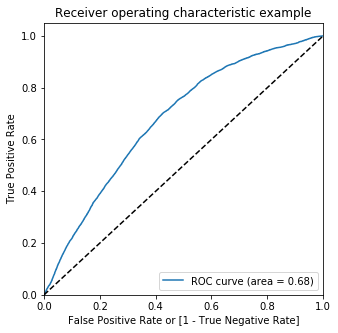

In [160]:
draw_roc(y_train_pred_final.actual_tag, y_train_pred_final.performance_prob)

In [161]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.performance_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,actual_tag,performance_prob,pred_tag,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.421328,0,1,1,1,1,1,0,0,0,0,0
1,0.0,0.268536,0,1,1,1,0,0,0,0,0,0,0
2,0.0,0.623239,1,1,1,1,1,1,1,1,0,0,0
3,0.0,0.669294,1,1,1,1,1,1,1,1,0,0,0
4,0.0,0.253404,0,1,1,1,0,0,0,0,0,0,0


In [162]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.actual_tag, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.500000  1.000000  0.000000
0.2   0.2  0.501056  0.999893  0.002218
0.3   0.3  0.604701  0.894435  0.314968
0.4   0.4  0.627600  0.841492  0.413707
0.5   0.5  0.637337  0.705232  0.569442
0.6   0.6  0.601246  0.423668  0.778823
0.7   0.7  0.534844  0.122438  0.947249
0.8   0.8  0.500000  0.000000  1.000000
0.9   0.9  0.500000  0.000000  1.000000


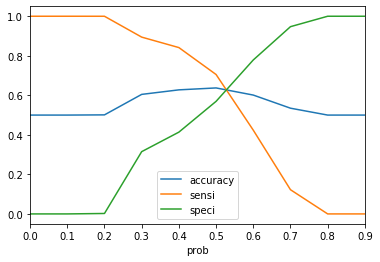

In [163]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [164]:
y_train_pred_final['final_predicted'] = y_train_pred_final.performance_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_pred_final.head()

,actual_tag,performance_prob,pred_tag,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.421328,0,1,1,1,1,1,0,0,0,0,0,0
1,0.0,0.268536,0,1,1,1,0,0,0,0,0,0,0,0
2,0.0,0.623239,1,1,1,1,1,1,1,1,0,0,0,1
3,0.0,0.669294,1,1,1,1,1,1,1,1,0,0,0,1
4,0.0,0.253404,0,1,1,1,0,0,0,0,0,0,0,0


In [165]:
# Let's check the overall aaccuracy.
print(metrics.accuracy_score(y_train_pred_final.actual_tag, y_train_pred_final.final_predicted))

0.634414794906252


In [166]:
# create onfusion matrix
cm = confusion_matrix(y_train_pred_final['actual_tag'], y_train_pred_final['final_predicted'])
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_pred_final['actual_tag'], y_train_pred_final['final_predicted'], average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
print("AUC:    \t", round(roc_auc_score(y_train_pred_final['actual_tag'], y_train_pred_final['performance_prob']),2))

[[28365 18516]
 [15762 31119]]
Sensitivity: 	0.66
Specificity: 	0.61
AUC:    	 0.68


In [167]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final['actual_tag'], y_train_pred_final['final_predicted']))

              precision    recall  f1-score   support

         0.0       0.64      0.61      0.62     46881
         1.0       0.63      0.66      0.64     46881

    accuracy                           0.63     93762
   macro avg       0.63      0.63      0.63     93762
weighted avg       0.63      0.63      0.63     93762



## Precision-Recall Tradeoff

In [168]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.actual_tag, y_train_pred_final.final_predicted

(0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
 5        0.0
 6        0.0
 7        0.0
 8        0.0
 9        0.0
 10       0.0
 11       0.0
 12       0.0
 13       0.0
 14       0.0
 15       0.0
 16       0.0
 17       0.0
 18       0.0
 19       0.0
 20       0.0
 21       0.0
 22       1.0
 23       0.0
 24       0.0
 25       0.0
 26       0.0
 27       0.0
 28       0.0
 29       0.0
         ... 
 93732    1.0
 93733    1.0
 93734    1.0
 93735    1.0
 93736    1.0
 93737    1.0
 93738    1.0
 93739    1.0
 93740    1.0
 93741    1.0
 93742    1.0
 93743    1.0
 93744    1.0
 93745    1.0
 93746    1.0
 93747    1.0
 93748    1.0
 93749    1.0
 93750    1.0
 93751    1.0
 93752    1.0
 93753    1.0
 93754    1.0
 93755    1.0
 93756    1.0
 93757    1.0
 93758    1.0
 93759    1.0
 93760    1.0
 93761    1.0
 Name: actual_tag, Length: 93762, dtype: float64, 0        0
 1        0
 2        1
 3        1
 4        0
 5        0
 6        1
 7        1
 

In [169]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.actual_tag, y_train_pred_final.performance_prob)

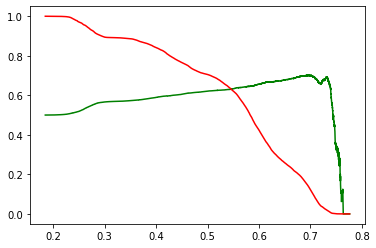

In [170]:
# Plotting precision recall graphs against probabilities
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Adjusting Cutoff

In [171]:
y_train_pred_final['final_predicted'] = y_train_pred_final.performance_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_pred_final.head()

,actual_tag,performance_prob,pred_tag,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.421328,0,1,1,1,1,1,0,0,0,0,0,0
1,0.0,0.268536,0,1,1,1,0,0,0,0,0,0,0,0
2,0.0,0.623239,1,1,1,1,1,1,1,1,0,0,0,1
3,0.0,0.669294,1,1,1,1,1,1,1,1,0,0,0,1
4,0.0,0.253404,0,1,1,1,0,0,0,0,0,0,0,0


In [172]:
# Let's check the overall aaccuracy.
print(metrics.accuracy_score(y_train_pred_final.actual_tag, y_train_pred_final.final_predicted))

0.634414794906252


In [173]:
# create onfusion matrix
cm = confusion_matrix(y_train_pred_final['actual_tag'], y_train_pred_final['final_predicted'])
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_pred_final['actual_tag'], y_train_pred_final['final_predicted'], average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
print("AUC:    \t", round(roc_auc_score(y_train_pred_final['actual_tag'], y_train_pred_final['performance_prob']),2))

[[28365 18516]
 [15762 31119]]
Sensitivity: 	0.66
Specificity: 	0.61
AUC:    	 0.68


In [174]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final['actual_tag'], y_train_pred_final['final_predicted']))

              precision    recall  f1-score   support

         0.0       0.64      0.61      0.62     46881
         1.0       0.63      0.66      0.64     46881

    accuracy                           0.63     93762
   macro avg       0.63      0.63      0.63     93762
weighted avg       0.63      0.63      0.63     93762



## Predictions on Test Set

In [175]:
X_test[col].head()

,woe_Age,woe_Education,woe_Gender,woe_Income,woe_Marital Status,woe_No of months in current company,woe_Profession,woe_Type of residence,woe_Avgas CC Utilization in last 12 months,woe_No of Inquiries in last 12 months (excluding home & auto loans),woe_No of Inquiries in last 6 months (excluding home & auto loans),woe_No of PL trades opened in last 12 months,woe_No of PL trades opened in last 6 months,woe_No of times 30 DPD or worse in last 12 months,woe_No of times 30 DPD or worse in last 6 months,woe_No of times 90 DPD or worse in last 12 months,woe_No of trades opened in last 6 months,woe_Presence of open auto loan,woe_Presence of open home loan,woe_Total No of Trades
63829,-0.007367,-0.017935,0.032211,0.046727,-0.004094,-0.073227,-0.013323,-0.004464,0.498793,0.182735,0.292629,0.395652,-0.314635,0.710255,0.742906,-0.133612,-0.270769,0.011973,0.073722,0.277181
12028,-0.028196,-0.017935,-0.010159,0.046727,-0.004094,0.021308,0.091334,0.004059,-0.723542,-0.828287,-0.320076,-0.453113,-0.314635,-0.268944,-0.198525,-0.133612,-0.270769,0.011973,0.073722,-0.686175
25143,0.031620,0.007916,0.032211,-0.110461,-0.004094,-0.073227,0.091334,-0.004464,-0.574300,0.182735,0.292629,-0.453113,-0.314635,-0.268944,-0.198525,-0.133612,0.354912,0.011973,0.073722,0.277181
30384,-0.028196,-0.017935,-0.010159,0.046727,-0.004094,0.021308,-0.028367,-0.004464,-0.723542,0.368408,-0.320076,0.395652,0.400627,-0.268944,-0.198525,-0.133612,0.354912,0.011973,-0.236703,0.277380
6891,-0.007367,0.007916,-0.010159,-0.110461,-0.004094,0.150759,-0.013323,-0.004464,-0.723542,-0.828287,-0.320076,-0.453113,-0.314635,-0.268944,-0.198525,-0.133612,-0.270769,0.011973,0.073722,-0.686175


In [176]:
# Getting the predicted values on the train set
y_test_pred = res.predict_proba(X_test[col])[:, 1]
y_test_pred[:10]

array([0.65556511, 0.27748343, 0.37630598, 0.45551607, 0.27860835,
       0.55224559, 0.55720146, 0.6234772 , 0.39773534, 0.62977879])

In [177]:
# Creating a dataframe with actual Converted flag and predicted possibilities
y_test_pred_final = pd.DataFrame({'actual_tag':y_test.values, 'performance_prob':y_test_pred})
y_test_pred_final.head()

,actual_tag,performance_prob
0,1.0,0.655565
1,0.0,0.277483
2,0.0,0.376306
3,0.0,0.455516
4,0.0,0.278608


In [178]:
# Creating a new column predicted with if Converted_Prob > 0.4 else 0
y_test_pred_final['pred_tag'] = y_test_pred_final.performance_prob.map(lambda x: 1 if x > 0.53 else 0)
y_test_pred_final.head()

,actual_tag,performance_prob,pred_tag
0,1.0,0.655565,1
1,0.0,0.277483,0
2,0.0,0.376306,0
3,0.0,0.455516,0
4,0.0,0.278608,0


In [179]:
# create onfusion matrix
cm = confusion_matrix(y_test_pred_final['actual_tag'], y_test_pred_final['pred_tag'])
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_pred_final['actual_tag'], y_test_pred_final['pred_tag'], average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


# check area under curve
print("AUC:    \t", round(roc_auc_score(y_test_pred_final['actual_tag'], y_test_pred_final['performance_prob']),2))

[[12064  7969]
 [  331   595]]
Sensitivity: 	0.64
Specificity: 	0.6
AUC:    	 0.66


In [180]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test_pred_final['actual_tag'],y_test_pred_final['pred_tag']))

              precision    recall  f1-score   support

         0.0       0.97      0.60      0.74     20033
         1.0       0.07      0.64      0.13       926

    accuracy                           0.60     20959
   macro avg       0.52      0.62      0.43     20959
weighted avg       0.93      0.60      0.72     20959



__We can observe that the metrics (sensitivity and specificity) from the model evaluation are consistent with that of the training model. Both sensitivity and specificity are above 60%. We will further analyse the metrics with other models such as decision tress and random forest.__

In [181]:
X = woe_df[col]
y = woe_df['Performance Tag']

In [182]:
y_pred = res.predict_proba(X)[:,1]
y_pred[:10]

array([0.22926248, 0.28043005, 0.23602353, 0.22381549, 0.25059357,
       0.2709477 , 0.25600541, 0.25230428, 0.24786568, 0.22133226])

In [183]:
decile_df = pd.DataFrame({'actual_default':y.values, 'performance_prob':y_pred})
decile_df.head()

,actual_default,performance_prob
0,0.0,0.229262
1,0.0,0.280430
2,0.0,0.236024
3,0.0,0.223815
4,0.0,0.250594


In [184]:
# Creating a new column pred_response with if Converted_Prob > 0.5 else 0
decile_df['pred_tag'] = decile_df.performance_prob.map(lambda x: 1 if x > 0.53 else 0)
decile_df.head()

,actual_default,performance_prob,pred_tag
0,0.0,0.229262,0
1,0.0,0.280430,0
2,0.0,0.236024,0
3,0.0,0.223815,0
4,0.0,0.250594,0


In [185]:
decile_df['decile'] = pd.qcut(decile_df['performance_prob'], 10, labels=np.arange(10, 0, -1))
decile_df.head()

,actual_default,performance_prob,pred_tag,decile
0,0.0,0.229262,0,10
1,0.0,0.280430,0,8
2,0.0,0.236024,0,10
3,0.0,0.223815,0,10
4,0.0,0.250594,0,10


In [186]:
lift_df = decile_df.groupby('decile')['performance_prob'].count().reset_index()
lift_df.rename({'performance_prob':'total'}, axis=1, inplace=True)
lift_df_pred = decile_df[decile_df['actual_default']==1].groupby('decile')['actual_default'].count().reset_index()

In [187]:
lift_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
decile    10 non-null category
total     10 non-null int64
dtypes: category(1), int64(1)
memory usage: 570.0 bytes


In [188]:
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)
lift_df_final['cumdefault'] = lift_df_final['actual_default'].cumsum()
lift_df_final['gain'] = 100*(lift_df_final['cumdefault']/sum(lift_df_final['actual_default']))
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))
lift_df_final

,decile,total,actual_default,cumdefault,gain,cumlift
9,1,6986,593,593,20.122158,2.012216
8,2,6986,529,1122,38.072616,1.903631
7,3,6986,401,1523,51.679674,1.722656
6,4,6986,372,1895,64.302681,1.607567
5,5,6986,319,2214,75.127248,1.502545
4,6,6986,241,2455,83.305056,1.388418
3,7,6986,184,2639,89.548694,1.279267
2,8,6985,119,2758,93.586698,1.169834
1,9,6982,88,2846,96.572786,1.073031
0,10,6992,101,2947,100.000000,1.000000


__We can observe that we are able to capture 80% of defaulters from the first 6 deciles.__

## Lift-Gain Chart

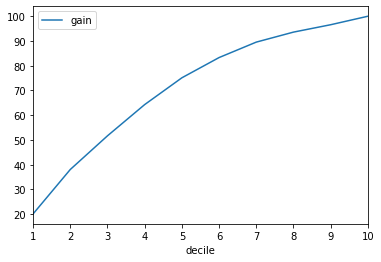

In [189]:
# Gain Chart
lift_df_final.plot.line(x='decile', y=['gain'])

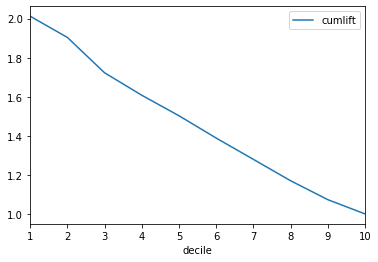

In [190]:
# Lift Chart
lift_df_final.plot.line(x='decile', y=['cumlift'])

## Model Building - Decision Tree - Overall Dataset

In [191]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [192]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93     20033
         1.0       0.07      0.17      0.10       926

    accuracy                           0.87     20959
   macro avg       0.52      0.53      0.52     20959
weighted avg       0.92      0.87      0.89     20959



__We can observe that the recall and precision is very less. Let's recheck our metrics after fine tuning our hyperparameters.__

In [193]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[18081  1952]
 [  771   155]]
0.870079679374016


## Hyperparameter Tuning

### Tuning for Max Depth

In [194]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [195]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.218215,0.010113,0.013384,0.000787,1,{'max_depth': 1},0.627280,0.647131,0.646651,0.647238,...,0.642990,0.007859,39,0.646918,0.641954,0.642074,0.641928,0.642074,0.642990,0.001965
1,0.358014,0.010877,0.012781,0.000383,2,{'max_depth': 2},0.627280,0.647131,0.665209,0.647238,...,0.646701,0.012002,38,0.646918,0.641954,0.659245,0.641928,0.642074,0.646424,0.006689
2,0.451838,0.011605,0.011984,0.000632,3,{'max_depth': 3},0.729284,0.775437,0.704672,0.778904,...,0.752490,0.030063,37,0.777184,0.765631,0.695947,0.765031,0.765978,0.753954,0.029353
3,0.527897,0.012312,0.011970,0.000632,4,{'max_depth': 4},0.746294,0.800928,0.777250,0.794529,...,0.784252,0.020966,36,0.811727,0.787495,0.761432,0.776870,0.787188,0.784942,0.016413
4,0.636110,0.048595,0.012768,0.001159,5,{'max_depth': 5},0.769009,0.826419,0.811860,0.835751,...,0.813293,0.023421,35,0.830298,0.810945,0.797734,0.817411,0.811705,0.813619,0.010543


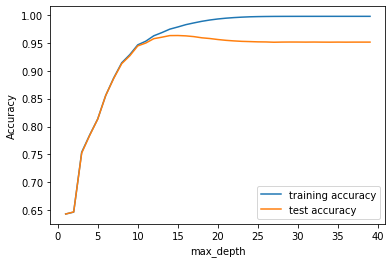

In [196]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning for min_sample_leaf

In [197]:
# GridSearchCV to find optimal sample leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [198]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.990833,0.055528,0.016950,0.001422,5,{'min_samples_leaf': 5},0.890050,0.987308,0.987895,0.987148,...,0.968015,0.038985,1,0.997334,0.973110,0.973137,0.972924,0.973150,0.977931,0.009702
1,1.083446,0.051225,0.018698,0.004178,25,{'min_samples_leaf': 25},0.878586,0.973283,0.974989,0.974989,...,0.955195,0.038312,2,0.984562,0.954806,0.954299,0.954873,0.954326,0.960573,0.011997
2,1.139032,0.088299,0.018580,0.002542,45,{'min_samples_leaf': 45},0.873254,0.966884,0.967097,0.967790,...,0.948593,0.037674,3,0.976096,0.947460,0.945767,0.946247,0.945181,0.952150,0.011996
3,1.105813,0.087937,0.016861,0.004657,65,{'min_samples_leaf': 65},0.870481,0.962831,0.962404,0.962564,...,0.943943,0.036736,4,0.971670,0.942461,0.940555,0.939955,0.938795,0.946687,0.012548
4,0.903375,0.058543,0.018788,0.004796,85,{'min_samples_leaf': 85},0.867762,0.959364,0.957711,0.961177,...,0.940968,0.036622,5,0.967990,0.938488,0.934795,0.938528,0.936728,0.943306,0.012418


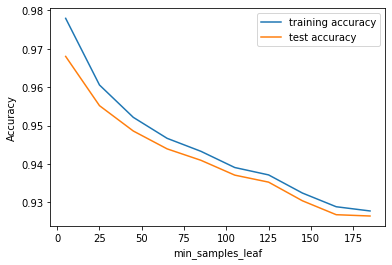

In [199]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning for min_sample_split

In [200]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [201]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.996692,0.046170,0.018239,0.003033,5,{'min_samples_split': 5},0.892023,0.978562,0.977016,0.978402,...,0.961061,0.034529,6,0.999773,0.984122,0.984415,0.984495,0.984015,0.987364,0.006207
1,0.936500,0.038393,0.016054,0.001626,25,{'min_samples_split': 25},0.888664,0.986935,0.987308,0.987308,...,0.967418,0.039379,1,0.996347,0.970964,0.970711,0.970537,0.970364,0.975785,0.010283
2,0.932456,0.055358,0.014113,0.007426,45,{'min_samples_split': 45},0.886744,0.984908,0.985228,0.985708,...,0.965540,0.039401,2,0.993827,0.966031,0.965325,0.965805,0.965645,0.971326,0.011253
3,0.967460,0.076171,0.015029,0.001058,65,{'min_samples_split': 65},0.884931,0.983095,0.984055,0.983948,...,0.963610,0.039348,3,0.991134,0.962778,0.962738,0.962178,0.962032,0.968172,0.011485
4,0.908008,0.045806,0.013825,0.007104,85,{'min_samples_split': 85},0.884718,0.982135,0.982455,0.983308,...,0.962746,0.039022,4,0.990574,0.960632,0.960499,0.960792,0.960165,0.966532,0.012023


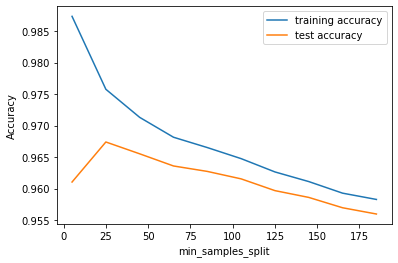

In [202]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid search to find optimal hyperparameters

In [203]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [204]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.741301,0.033355,0.010568,0.005297,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.760691,0.824179,0.815006,0.819539,0.822419,0.808366,0.024040,13
1,0.698142,0.007458,0.010583,0.005487,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.760691,0.824179,0.815006,0.819539,0.822419,0.808366,0.024040,13
2,0.690998,0.018553,0.013207,0.001319,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.760691,0.823912,0.814686,0.819539,0.822419,0.808249,0.023987,15
3,0.752284,0.029066,0.013766,0.001462,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.760691,0.823912,0.814686,0.819539,0.822419,0.808249,0.023987,15
4,0.988302,0.037014,0.014040,0.001512,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.852138,0.956911,0.946032,0.945872,0.957071,0.931603,0.040040,3
5,0.991449,0.035608,0.016822,0.003817,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.852138,0.956911,0.946032,0.945872,0.957071,0.931603,0.040040,3
6,0.983948,0.065003,0.014257,0.000730,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.847766,0.947739,0.940700,0.941446,0.952432,0.926015,0.039362,7
7,0.996707,0.026762,0.012138,0.003615,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.847766,0.947739,0.940700,0.941446,0.952432,0.926015,0.039362,7
8,0.591260,0.017175,0.010979,0.002955,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.769009,0.826419,0.811860,0.835751,0.823432,0.813293,0.023421,9
9,0.582620,0.004565,0.014871,0.004113,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.769009,0.826419,0.811860,0.835751,0.823432,0.813293,0.023421,9


In [205]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9363921418058488
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [206]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [207]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9521446633904289

In [208]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     46881
         1.0       1.00      0.88      0.93     46881

    accuracy                           0.94     93762
   macro avg       0.94      0.94      0.94     93762
weighted avg       0.94      0.94      0.94     93762



## Predictions on Test set

In [209]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     20033
         1.0       0.09      0.01      0.02       926

    accuracy                           0.95     20959
   macro avg       0.53      0.50      0.50     20959
weighted avg       0.92      0.95      0.93     20959



__We can observe that the decision tree model did well on the training set but had a setback on the testing set. This is a clear case of overfitting. One of the reasons for overfitting is the tree depth. Let's reduce the tree depth and check if the problem of overfitting still exists.__

In [210]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8205067035641014


In [211]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90     20033
         1.0       0.07      0.26      0.11       926

    accuracy                           0.82     20959
   macro avg       0.52      0.55      0.51     20959
weighted avg       0.92      0.82      0.87     20959



In [212]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[16958  3075]
 [  687   239]]


__After decreasing the tree depth, we can observe that the recall increased. However, it's still significantly low. Hence, I would not consider decision tree as my go to model for the scorecard. Logistic regression had produced better results with Sensitivity and specificity both above 60%. Hence I would be building the scorecard on top of the logistic regression model.__

__**Please note, we haven't included random forests/svm because of high computational times we encountered.__

## Application Scorecard

In [213]:
X = woe_df[col]
y = woe_df['Performance Tag']

In [214]:
y_pred = res.predict_proba(X)[:,1]
y_pred[:10]

array([0.22926248, 0.28043005, 0.23602353, 0.22381549, 0.25059357,
       0.2709477 , 0.25600541, 0.25230428, 0.24786568, 0.22133226])

In [215]:
df_scorecard = pd.DataFrame({'actual_tag':y.values, 'performance_prob':y_pred})
df_scorecard.head()

,actual_tag,performance_prob
0,0.0,0.229262
1,0.0,0.280430
2,0.0,0.236024
3,0.0,0.223815
4,0.0,0.250594


In [216]:
# Creating a new column pred_response with if Converted_Prob > 0.5 else 0
df_scorecard['pred_tag'] = df_scorecard.performance_prob.map(lambda x: 1 if x > 0.53 else 0)
df_scorecard.head()

,actual_tag,performance_prob,pred_tag
0,0.0,0.229262,0
1,0.0,0.280430,0
2,0.0,0.236024,0
3,0.0,0.223815,0
4,0.0,0.250594,0


In [217]:
# Converting probability to application score (Credit Score)
base_score = 400
base_odds = 10
points_double_odds = 20

factor = points_double_odds / np.log(2)
offset = base_score - factor * np.log(base_odds)

#scorecard['score'] = offset + factor * scorecard['logit']
df_scorecard['score'] = offset + factor * np.log((1-df_scorecard['performance_prob'])/df_scorecard['performance_prob'])

In [218]:
print('Lowest 5 scores')
print(df_scorecard.sort_values('score').head())
print('Highest 5 scores')
print(df_scorecard.sort_values('score').tail())

Lowest 5 scores
       actual_tag  performance_prob  pred_tag       score
64758         0.0          0.776182         1  297.680005
60045         0.0          0.775680         1  297.763347
68626         0.0          0.773597         1  298.107691
69778         0.0          0.773229         1  298.168248
68794         0.0          0.765596         1  299.409698
Highest 5 scores
       actual_tag  performance_prob  pred_tag       score
95            0.0          0.156186         0  382.234632
3871          0.0          0.155765         0  382.326926
9051          0.0          0.154547         0  382.595096
18829         0.0          0.154383         0  382.631191
18972         0.0          0.149505         0  383.723681


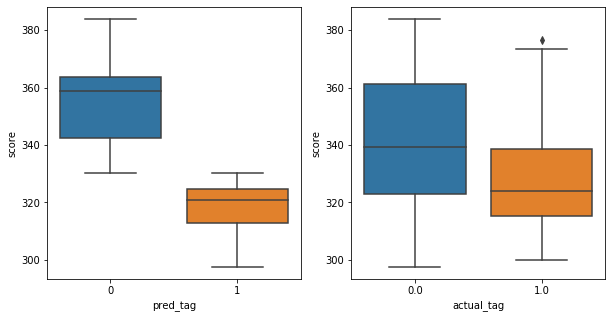

In [219]:
# Visualize distributions of Scores for Predicted Dafaults and Actual Defaults
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='pred_tag', y='score', data=df_scorecard)

plt.subplot(1, 2, 2)
sns.boxplot(x='actual_tag', y='score', data=df_scorecard)

##### Observation 
It can be seen that for predicted defaults score threshold of approx 330 separates the defaults cases against non-default cases. Wherease for actual defaults, score threshold is not very clear to calculate. Most of the cases below 322 are defaults, and most of the cases above 338 are good customers. And in the range of 322-338, we have good customers as well as bad customers. 
Let's check if the above inferences hold true for the rejected population.

In [220]:
reject_woe_df.head()

,Application ID,woe_Age,woe_Education,woe_Gender,woe_Income,woe_Marital Status,woe_No of dependents,woe_No of months in current company,woe_No of months in current residence,woe_Profession,...,woe_No of times 60 DPD or worse in last 6 months,woe_No of times 90 DPD or worse in last 12 months,woe_No of times 90 DPD or worse in last 6 months,woe_No of trades opened in last 12 months,woe_No of trades opened in last 6 months,woe_Outstanding Balance,woe_Presence of open auto loan,woe_Presence of open home loan,woe_Total No of Trades,Performance Tag
69594,906908303,0.031620,0.007916,-0.010159,0.234003,0.023338,0.005374,0.021308,0.203025,-0.028367,...,-0.121396,-0.133612,-0.036826,0.368415,0.354912,0.088938,0.011973,0.073722,0.277380,NaN
69595,10990583,-0.007367,0.007916,0.032211,0.234003,-0.004094,-0.010429,0.021308,0.203025,0.091334,...,-0.121396,0.722079,-0.036826,0.228323,0.354912,0.088938,0.011973,0.073722,0.277181,NaN
69596,589678446,-0.007367,-0.017935,-0.010159,0.234003,-0.004094,0.005374,0.021308,-0.241239,0.091334,...,0.743374,0.722079,0.836054,0.228323,-0.270769,-0.096418,0.011973,0.073722,0.277181,NaN
69597,809411322,-0.007367,0.007916,-0.010159,0.046727,-0.004094,0.005374,-0.073227,-0.241239,-0.028367,...,0.743374,0.722079,-0.036826,0.228323,-0.270769,0.088938,0.011973,0.073722,0.277181,NaN
69598,150246616,-0.007367,0.007916,0.032211,0.046727,-0.004094,-0.010429,-0.073227,-0.241239,-0.028367,...,0.743374,0.722079,0.836054,0.228323,0.354912,0.088938,-0.138237,0.073722,0.277181,NaN


## Rejected Population

In [221]:
X = reject_woe_df[col]

In [222]:
y_pred = res.predict_proba(X)[:,1]
y_pred[:10]

array([0.65516586, 0.65590855, 0.74648376, 0.69887495, 0.65571224,
       0.65820874, 0.6511973 , 0.71494737, 0.68387947, 0.7313079 ])

In [223]:
reject_df_scorecard = pd.DataFrame({'performance_prob':y_pred})
reject_df_scorecard.head()

,performance_prob
0,0.655166
1,0.655909
2,0.746484
3,0.698875
4,0.655712


In [224]:
# Creating a new column pred_response with if Converted_Prob > 0.5 else 0
reject_df_scorecard['pred_tag'] = reject_df_scorecard.performance_prob.map(lambda x: 1 if x > 0.53 else 0)
reject_df_scorecard.head()

,performance_prob,pred_tag
0,0.655166,1
1,0.655909,1
2,0.746484,1
3,0.698875,1
4,0.655712,1


In [225]:
# Converting probability to application score (Credit Score)
base_score = 400
base_odds = 10
points_double_odds = 20

factor = points_double_odds / np.log(2)
offset = base_score - factor * np.log(base_odds)

#scorecard['score'] = offset + factor * scorecard['logit']
reject_df_scorecard['score'] = offset + factor * np.log((1-reject_df_scorecard['performance_prob'])/reject_df_scorecard['performance_prob'])

In [226]:
print('Lowest 5 scores')
print(reject_df_scorecard.sort_values('score').head())
print('Highest 5 scores')
print(reject_df_scorecard.sort_values('score').tail())

Lowest 5 scores
      performance_prob  pred_tag       score
175           0.765647         1  299.401449
806           0.764967         1  299.510717
1050          0.759828         1  300.329415
1192          0.758515         1  300.536528
111           0.757911         1  300.631652
Highest 5 scores
      performance_prob  pred_tag       score
1327          0.437270         0  340.839832
1335          0.434554         0  341.158559
273           0.419555         0  342.927455
1326          0.377047         0  348.049009
262           0.361853         0  349.931152


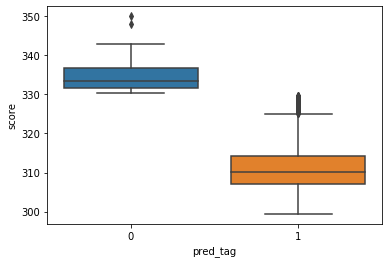

In [227]:
sns.boxplot(x='pred_tag', y='score', data=reject_df_scorecard)

__Here, with the rejected population, we can clearly demarkate the good and default customers at a score of 330 and this lies in the range that we infered from the actual population. Hence we shall move forward with the threshold score of 330.
Any customer with score above 330 would be a good customer and anyone below 330 would be a defaulter.__

## Financial Benifit

__Let the average credit loss from a defaulter be 100.0__

__Let the average profit from a good customer be 5.0__

In [228]:
df_scorecard.head()

,actual_tag,performance_prob,pred_tag,score
0,0.0,0.229262,0,368.546225
1,0.0,0.280430,0,360.751318
2,0.0,0.236024,0,367.453388
3,0.0,0.223815,0,369.443233
4,0.0,0.250594,0,365.169417


In [229]:
df_scorecard['pred_tag'] = df_scorecard['score'].apply(lambda x: 1 if x<330 else 0)
df_scorecard.head()

,actual_tag,performance_prob,pred_tag,score
0,0.0,0.229262,0,368.546225
1,0.0,0.280430,0,360.751318
2,0.0,0.236024,0,367.453388
3,0.0,0.223815,0,369.443233
4,0.0,0.250594,0,365.169417


In [230]:
# create onfusion matrix
cm = confusion_matrix(df_scorecard['actual_tag'], df_scorecard['pred_tag'])
print(cm)

[[40514 26400]
 [ 1034  1913]]


In [231]:
# Actual/Predicted       No             Yes
# no                   40514          26400
# yes                  1034           1913 

In [232]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [233]:
# Number of defaulters the model correctly identified
TP

1913

In [234]:
# Total credit loss saved by identifying the defaulters
TP*100

191300

In [235]:
# Total number of good customers identified as defaulters
FP

26400

In [236]:
# Loss incured due to incorrecly predicting good customers as defaulters
FP*5

132000

In [237]:
# Net profit = Profit from the good customers predicted as good + Profit from bad customers predicted as bad - 
#              (Loss from the bad customers predicted as good + Loss from good customers predicted as bad)
(TN*5+TP*100) - (FN*100 + FP*5)

158470